In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("../data_processing/cleaned/cms_hospital_costs_2011_2022_cleaned.csv")
data.head()

rpt_rec_num  provider_ccn                        hospital_name  \
0    521355.73         10005      Marshall Medical Center - South   
1    521355.73        271326            Beartooth Billings Clinic   
2    521355.73         10052       Lake Martin Community Hospital   
3    521355.73         13025       Healthsouth Lakeshore Hospital   
4    521355.73        103037  Healthsouth Rehabilitation Hospital   

                    street_address        city state_code  zip_code  \
0            2505 u.s. highway 431        Boaz         AL     35957   
1              2525 north broadway   Red Lodge         MT     59806   
2                1231 south street   Dadeville         AL     36853   
3              3800 ridgeway drive  Birmingham         AL     35209   
4  901 north clearwater-largo road       Largo         FL     33770   

       county  medicare_cbsa_number rural_versus_urban  ...  \
0    Marshall               13820.0                  r  ...   
1      Carbon               99927.0                  r  ...   
2  Tallapoosa               99919.0                  u  ...   
3   Jefferson               13820.0                  u  ...   
4    Pinellas               45300.0                  u  ...   

  net_revenue_from_stand_alone_chip  stand_alone_chip_charges  year  \
0                               NaN                       NaN  2011   
1                               NaN                       NaN  2011   
2                               NaN                       NaN  2011   
3                               NaN                       NaN  2011   
4                               NaN                       NaN  2011   

  fiscal_year_length_days fiscal_year  occupancy_rate  \
0                     364        2011        0.472026   
1                     364        2011        0.131068   
2                     364        2011        0.159678   
3                     364        2011        0.887068   
4                     364        2011        0.663836   

   cost_to_charge_ratio_calc  profit_margin_calc  charity_care_ratio  \
0                   0.844850           -0.042515            0.022639   
1                   3.881714           -0.096679            0.023203   
2                   2.660672            0.010086                 NaN   
3                   0.467989            0.297379                 NaN   
4                   0.663339            0.225524                 NaN   

     ccn_facility_type_full  
0       short-term hospital  
1  critical access hospital  
2       short-term hospital  
3   rehabilitation hospital  
4   rehabilitation hospital  

[5 rows x 125 columns]

In [28]:
data.describe()

rpt_rec_num   provider_ccn      zip_code  medicare_cbsa_number  \
count   73974.000000   73974.000000  73974.000000          73048.000000   
mean   679935.216819  269488.837835  53635.105199          53689.069502   
std     76447.000899  158083.277138  26967.175067          34225.378449   
min    521355.730000   10001.000000    605.000000          10900.000000   
25%    619220.750000  140200.000000  32547.750000          26420.000000   
50%    695530.500000  260064.000000  55057.000000          39740.000000   
75%    748306.000000  392050.000000  76054.000000          99917.000000   
max    774849.270000  713029.000000  99969.000000          99952.000000   

       provider_type  type_of_control  fte___employees_on_payroll  \
count   73974.000000     73974.000000                72518.000000   
mean        1.718455         4.227039                  784.344664   
std         1.550868         3.223202                 1227.671061   
min         1.000000         1.000000                   26.310000   
25%         1.000000         2.000000                  127.057500   
50%         1.000000         4.000000                  295.420000   
75%         1.000000         5.000000                  891.477500   
max        11.000000        13.000000                 7279.312300   

       number_of_interns_and_residents__fte_  total_days_title_v  \
count                           16015.000000         2443.000000   
mean                               89.289905         2117.149816   
std                               145.161760         4395.595377   
min                                 0.900000           97.000000   
25%                                 8.230000           97.000000   
50%                                27.060000          420.000000   
75%                                96.980000         2015.500000   
max                               710.767400        27817.920000   

       total_days_title_xviii  ...  medicaid_charges  \
count            72404.000000  ...      5.445700e+04   
mean              8985.840358  ...      1.187553e+08   
std              12288.686538  ...      2.174221e+08   
min                 49.000000  ...      1.813740e+05   
25%               1376.000000  ...      6.785896e+06   
50%               3845.000000  ...      3.263559e+07   
75%              11396.250000  ...      1.240715e+08   
max              64321.410000  ...      1.277970e+09   

       net_revenue_from_stand_alone_chip  stand_alone_chip_charges  \
count                       1.203700e+04              1.221800e+04   
mean                        6.228006e+05              2.973672e+06   
std                         1.724155e+06              8.101942e+06   
min                         2.751000e+03              1.370300e+04   
25%                         2.534200e+04              1.173705e+05   
50%                         9.404800e+04              4.955340e+05   
75%                         3.580060e+05              1.963020e+06   
max                         1.197255e+07              5.897095e+07   

               year  fiscal_year_length_days   fiscal_year  occupancy_rate  \
count  73974.000000             73974.000000  73974.000000    72886.000000   
mean    2016.467502               361.630384   2016.888555        0.509243   
std        3.443559                12.530575      3.478525        0.236077   
min     2011.000000               300.000000   2011.000000        0.044749   
25%     2013.000000               364.000000   2014.000000        0.319123   
50%     2016.000000               364.000000   2017.000000        0.519244   
75%     2019.000000               364.000000   2020.000000        0.695876   
max     2022.000000               365.000000   2023.000000        0.972780   

       cost_to_charge_ratio_calc  profit_margin_calc  charity_care_ratio  
count               72957.000000        70896.000000        52694.000000  
mean                    1.265134            0.037603            0.029175  
std                     1.285820  

### Variable Selection Rationale

### Purpose of Variable Selection

The original CMS dataset contained over **100 variables** covering financial, operational, accounting, and administrative data.
The project’s goal is to conduct **deep financial, operational, and geographic analysis** across U.S. hospitals from 2011–2022.

To achieve analytical clarity and consistent performance in Power BI and Tableau, only variables that:

* Contribute directly to performance indicators (KPIs)
* Are consistently reported across all years
* Represent key financial and operational dimensions
* Enable regional and ownership-based segmentation were retained.

This reduced the dataset to **34 key variables**, enhancing interpretability, computational efficiency, and dashboard usability.

### 1. Operational Variables

#### Kept Columns

| Variable                                       | Rationale                                                                               |
| ---------------------------------------------- | --------------------------------------------------------------------------------------- |
| `year`                                         | Enables multi-year trend analysis from 2011–2022.                                       |
| `state_code`                                   | Supports state-level comparisons and aggregation.                                       |
| `provider_type`                                | Identifies service type or specialization.                                              |
| `rural_versus_urban`                           | Differentiates access and performance by location type.                                 |
| `ccn_facility_type`                            | Identifies facility classification (e.g., Short-Term, Critical Access, Rehabilitation). |
| `number_of_beds`                               | Core measure of hospital capacity.                                                      |
| `total_bed_days_available`                     | Denominator for occupancy rate calculations.                                            |
| `occupancy_rate`                               | Key operational efficiency indicator.                                                   |
| `total_discharges__v___xviii___xix___unknown_` | Represents patient volume and throughput.                                               |
| `total_days__v___xviii___xix___unknown_`       | Used to calculate average length of stay.                                               |
| `fte___employees_on_payroll`                   | Used to calculate staff-to-bed ratio (labor efficiency).                                |

#### Excluded Operational Columns

* `hospital_number_of_beds_for_adults___peds`, `number_of_beds___total_for_all_subproviders`: redundant with `number_of_beds`.
* `total_days_title_xviii`, `total_days_title_xix`: program-specific and inconsistent across years.
* `fiscal_year_begin_date`, `fiscal_year_end_date`: metadata, not analytical.
* `street_address`: unnecessary for aggregate or geographic analysis.
* `number_of_interns_and_residents__fte_`: relevant only to teaching hospitals.

### 2. Financial Variables

#### Kept Columns

| Variable                                            | Rationale                                            |
| --------------------------------------------------- | ---------------------------------------------------- |
| `net_patient_revenue`                               | Primary source of hospital income.                   |
| `total_income`                                      | Used to calculate overall profitability.             |
| `net_income`                                        | Represents total profit or loss.                     |
| `total_costs`                                       | Foundation for expense-based analysis.               |
| `total_other_expenses`                              | Captures additional operational spending.            |
| `total_assets`                                      | Indicates overall financial strength.                |
| `total_liabilities`                                 | Used to measure debt exposure.                       |
| `total_current_assets`, `total_current_liabilities` | For liquidity and short-term solvency ratios.        |
| `cash_on_hand_and_in_banks`                         | Reflects immediate liquidity.                        |
| `accounts_receivable`, `accounts_payable`           | Represent short-term working capital measures.       |
| `profit_margin_calc`                                | Core profitability KPI.                              |
| `cost_to_charge_ratio`                              | Efficiency of converting costs to revenue.           |
| `charity_care_ratio`                                | Shows proportion of charity services.                |
| `cost_of_charity_care`                              | Actual dollar cost of charity services.              |
| `total_unreimbursed_and_uncompensated_care`         | Measures total community support and charity burden. |

#### Excluded Financial Columns

| Excluded Variable                                                                                        | Reason                                                           |
| -------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- |
| `less_total_operating_expense`                                                                           | Duplicates total cost measure.                                   |
| `net_income_from_service_to_patients`                                                                    | Overlaps with `net_income`.                                      |
| `temporary_investments`, `investments`, `land`, `buildings`, `leasehold_improvements`, `fixed_equipment` | Detailed accounting fields, not relevant to high-level analysis. |
| `wage_related_costs_*`, `contract_labor__direct_patient_care`                                            | Staff-level details excluded for aggregated analysis.            |
| `drg_amounts_*`, `disproportionate_share_adjustment`, `managed_care_simulated_payments`                  | Medicare-specific payment details excluded for generalization.   |
| `mortgage_payable`, `notes_payable`, `other_long_term_liabilities`                                       | Redundant—captured under total liabilities.                      |
| `general_fund_balance`, `total_fund_balances`                                                            | Internal accounting fields not used analytically.                |
| `outpatient_revenue`, `inpatient_revenue`                                                                | Subcomponents of total patient revenue.                          |

### 3. Geographic and Ownership Variables

#### Kept Columns

| Variable               | Rationale                                               |
| ---------------------- | ------------------------------------------------------- |
| `hospital_name`        | Identifies individual hospital records.                 |
| `city`, `county`       | Regional segmentation for local-level comparison.       |
| `zip_code`             | Enables mapping by postal area in Power BI and Tableau. |
| `medicare_cbsa_number` | Distinguishes metropolitan vs rural markets.            |
| `type_of_control`      | Defines ownership (Government, Proprietary, Nonprofit). |

#### Excluded Geographic Columns

| Variable                 | Reason                                    |
| ------------------------ | ----------------------------------------- |
| `street_address`         | Too granular for regional-level analysis. |
| `ccn_facility_type_full` | Redundant with `ccn_facility_type`.       |

### 4. Columns Excluded for Technical Reasons

| Category                          | Example Columns                                                                     | Reason                                       |
| --------------------------------- | ----------------------------------------------------------------------------------- | -------------------------------------------- |
| **Date fields**                   | `fiscal_year_begin_date`, `fiscal_year_end_date`                                    | Not required after deriving `year`.          |
| **Sparse or missing data**        | `stand_alone_chip_charges`, `net_revenue_from_medicaid`, `allowable_dsh_percentage` | High proportion of missing values.           |
| **Derived or duplicate metrics**  | `cost_to_charge_ratio_calc`                                                         | Duplicate of existing field.                 |
| **Internal accounting variables** | `deferred_income`, `prepaid_expenses`, `other_assets`                               | Limited analytical value at aggregate level. |

### 5. Summary of Variable Selection

| Analytical Focus            | Objective                                       | Example Variables                                                          |
| --------------------------- | ----------------------------------------------- | -------------------------------------------------------------------------- |
| **Operational Efficiency**  | Evaluate utilization, staffing, and capacity.   | `occupancy_rate`, `number_of_beds`, `fte___employees_on_payroll`           |
| **Financial Health**        | Assess profitability, liquidity, and solvency.  | `profit_margin_calc`, `total_assets`, `total_liabilities`, `current_ratio` |
| **Social & Community Role** | Measure charity and uncompensated care efforts. | `charity_care_ratio`, `total_unreimbursed_and_uncompensated_care`          |
| **Regional Comparison**     | Analyze differences by geography and ownership. | `state_code`, `rural_versus_urban`, `type_of_control`                      |

### 6. Outcome

* The dataset was reduced from **118 variables** to **34 key variables**.
* Remaining variables are consistent across all years and directly tied to financial and operational performance.
* The final dataset supports:

  * Exploratory Data Analysis (EDA)
  * KPI and Ratio Computation
  * Power BI and Tableau Dashboards


In [29]:
# Step 1: Define Operational Columns
operational_cols = [
    'year', 'state_code', 'provider_type', 'rural_versus_urban', 'ccn_facility_type',
    'number_of_beds', 'total_bed_days_available', 'occupancy_rate',
    'total_discharges__v___xviii___xix___unknown_', 'total_days__v___xviii___xix___unknown_',
    'fte___employees_on_payroll'
]

# Step 2: Define Financial Columns
financial_cols = [
    'net_patient_revenue', 'total_income', 'net_income', 'total_costs',
    'total_other_expenses', 'total_assets', 'total_liabilities',
    'total_current_assets', 'total_current_liabilities',
    'cash_on_hand_and_in_banks', 'accounts_receivable', 'accounts_payable',
    'profit_margin_calc', 'cost_to_charge_ratio', 'charity_care_ratio',
    'cost_of_charity_care', 'total_unreimbursed_and_uncompensated_care'
]

# Step 3: Define Demographic & Geospatial Columns
geo_demo_cols = [
    'hospital_name', 'city', 'county', 'zip_code', 'medicare_cbsa_number', 'type_of_control'
]

# Step 4: Combine All Selected Columns
keep_cols = list(dict.fromkeys(operational_cols + financial_cols + geo_demo_cols))
existing_cols = [c for c in keep_cols if c in data.columns]

# Step 5: Create New EDA Subset
data_eda = data[existing_cols].copy()
print(f"\nSubset created successfully: {data_eda.shape[0]:,} rows × {data_eda.shape[1]} columns")

# Step 6: Display Structure and Sample
print("\nPreview of subset data:")
display(data_eda.head(3))

print("\nDataset Info:")
data_eda.info()

# Step 7: Missing Value Summary
missing_cnt = data_eda.isna().sum().sort_values(ascending=False)
missing_pct = (data_eda.isna().mean() * 100).sort_values(ascending=False)

missing_summary = pd.concat(
    [missing_cnt.rename("Missing_Count"), missing_pct.rename("Missing_%")], axis=1
)

print("\nMissing Value Summary (Top 25 Columns):")
display(missing_summary.head(25))



Subset created successfully: 73,974 rows × 34 columns

Preview of subset data:


year state_code  provider_type rural_versus_urban ccn_facility_type  \
0  2011         AL              1                  r               sth   
1  2011         MT              1                  r               cah   
2  2011         AL              1                  u               sth   

   number_of_beds  total_bed_days_available  occupancy_rate  \
0           114.0                   41610.0        0.472026   
1            25.0                    9125.0        0.131068   
2            46.0                   16790.0        0.159678   

   total_discharges__v___xviii___xix___unknown_  \
0                                        5283.0   
1                                         155.0   
2                                         892.0   

   total_days__v___xviii___xix___unknown_  ...  cost_to_charge_ratio  \
0                                 19641.0  ...              0.282971   
1                                  1196.0  ...              1.061421   
2                                  2681.0  ...              0.641784   

   charity_care_ratio  cost_of_charity_care  \
0            0.022639             1312622.0   
1            0.023203              204811.0   
2                 NaN                   NaN   

   total_unreimbursed_and_uncompensated_care                    hospital_name  \
0                                  1439490.0  Marshall Medical Center - South   
1                                   827330.0        Beartooth Billings Clinic   
2                                  1911488.0   Lake Martin Community Hospital   

        city      county  zip_code  medicare_cbsa_number  type_of_control  
0       Boaz    Marshall     35957               13820.0                9  
1  Red Lodge      Carbon     59806               99927.0                2  
2  Dadeville  Tallapoosa     36853               99919.0                5  

[3 rows x 34 columns]


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          73974 non-null  int64  
 1   state_code                                    73974 non-null  object 
 2   provider_type                                 73974 non-null  int64  
 3   rural_versus_urban                            73974 non-null  object 
 4   ccn_facility_type                             73974 non-null  object 
 5   number_of_beds                                72976 non-null  float64
 6   total_bed_days_available                      72980 non-null  float64
 7   occupancy_rate                                72886 non-null  float64
 8   total_discharges__v___xviii___xix___unknown_  72882 non-null  float64
 9   total_days__v___xviii___xix___unknown_        

Missing_Count  Missing_%
total_other_expenses                                  50807  68.682240
charity_care_ratio                                    21280  28.766864
cost_of_charity_care                                  21280  28.766864
total_unreimbursed_and_uncompensated_care             15075  20.378782
cost_to_charge_ratio                                  14087  19.043177
cash_on_hand_and_in_banks                              6024   8.143402
accounts_payable                                       4502   6.085922
accounts_receivable                                    4355   5.887204
total_current_liabilities                              3685   4.981480
total_liabilities                                      3653   4.938222
total_current_assets                                   3541   4.786817
total_assets                                           3354   4.534025
profit_margin_calc                                     3078   4.160921
net_patient_revenue                                    2993   4.046016
fte___employees_on_payroll                             1456   1.968259
total_discharges__v___xviii___xix___unknown_           1092   1.476194
occupancy_rate                                         1088   1.470787
total_days__v___xviii___xix___unknown_                 1080   1.459972
net_income                                             1055   1.426177
total_income                                           1050   1.419418
number_of_beds                                          998   1.349123
total_bed_days_available                                994   1.343715
total_costs                                             935   1.263958
medicare_cbsa_number                                    926   1.251791
state_code                                                0   0.000000

In [30]:
# Step 1: Drop columns with >80% missing values
threshold = 0.8 * len(data_eda)
cols_to_drop = [col for col in data_eda.columns if data_eda[col].isna().sum() > threshold]
data_eda = data_eda.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with >80% missing values.")
print("Remaining columns:", len(data_eda.columns))

# Step 2: Fill numeric columns with median (safe assignment)
for col in data_eda.select_dtypes(include=['float64', 'int64']).columns:
    median_val = data_eda[col].median()
    data_eda[col] = data_eda[col].fillna(median_val)

# Step 3: Fill categorical columns with mode (safe assignment)
for col in data_eda.select_dtypes(include='object').columns:
    mode_val = data_eda[col].mode()[0]
    data_eda[col] = data_eda[col].fillna(mode_val)

print("Missing values handled successfully.")

Dropped 0 columns with >80% missing values.
Remaining columns: 34
Missing values handled successfully.


In [31]:
data_eda['rural_versus_urban'] = data_eda['rural_versus_urban'].replace({
    1: 'Urban', 2: 'Rural',
    '1': 'Urban', '2': 'Rural',
    'R': 'Rural', 'U': 'Urban',
    'r': 'Rural', 'u': 'Urban',
    'unknown': 'Unknown'
})

facility_map = {
    'Sth': 'Short-Term Hospital',
    'Cah': 'Critical Access Hospital',
    'Rh': 'Rehabilitation Hospital',
    'Ltch': 'Long-Term Care Hospital',
    'Ph': 'Psychiatric Hospital',
    'Rnmhc': 'Religious Non-Medical Health Care Institution',
    'Ch': 'Children’s Hospital',
    'Ord': 'Specialty Hospital',
    'Other': 'Specialty Hospital'
}

data_eda['ccn_facility_type'] = (
    data_eda['ccn_facility_type']
    .astype(str).str.strip().str.title()
    .replace(facility_map)
)
data_eda['ccn_facility_type'] = data_eda['ccn_facility_type'].fillna('Specialty Hospital')

provider_type_map = {
    1: 'General Short-Term (includes CAH)',
    2: 'General Long-Term',
    3: 'Cancer Hospital',
    4: 'Psychiatric Hospital',
    5: 'Rehabilitation Hospital',
    6: 'Religious Non-Medical Health Care Institution',
    7: 'Children’s Hospital',
    8: 'Reserved / Unused Code',
    9: 'Other',
    10: 'Extended Neoplastic Disease Care Hospital',
    11: 'Indian Health Services Hospital',
    12: 'Rural Emergency Hospital'
}
data_eda['provider_type'] = data_eda['provider_type'].replace(provider_type_map)

control_map = {
    1: 'Voluntary Non-Profit, Church',
    2: 'Voluntary Non-Profit, Other',
    3: 'Proprietary, Individual',
    4: 'Proprietary, Corporation',
    5: 'Proprietary, Partnership',
    6: 'Proprietary, Other',
    7: 'Government, Federal',
    8: 'Government, City-County',
    9: 'Government, County',
    10: 'Government, State',
    11: 'Government, Hospital District',
    12: 'Government, City',
    13: 'Government, Other'
}
data_eda['type_of_control'] = data_eda['type_of_control'].replace(control_map)

state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia',
    'PR': 'Puerto Rico', 'GU': 'Guam', 'VI': 'Virgin Islands', 'AS': 'American Samoa',
    'MP': 'Northern Mariana Islands'
}
data_eda['state_full_name'] = data_eda['state_code'].map(state_map)

categorical_cols = [
    'state_code', 'state_full_name', 'rural_versus_urban',
    'ccn_facility_type', 'type_of_control', 'provider_type',
    'hospital_name', 'city', 'county', 'zip_code',
    'medicare_cbsa_number', 'year'
]

for col in categorical_cols:
    if col in data_eda.columns:
        data_eda[col] = data_eda[col].astype(str).str.strip().astype('category')

if 'zip_code' in data_eda.columns:
    data_eda['zip_code'] = data_eda['zip_code'].str.zfill(5)
if 'medicare_cbsa_number' in data_eda.columns:
    data_eda['medicare_cbsa_number'] = data_eda['medicare_cbsa_number'].astype(str).astype('category')
if 'year' in data_eda.columns:
    data_eda['year'] = data_eda['year'].astype(str).astype('category')

print("Categorical normalization complete")
data_eda.info()

Categorical normalization complete
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   year                                          73974 non-null  category
 1   state_code                                    73974 non-null  category
 2   provider_type                                 73974 non-null  category
 3   rural_versus_urban                            73974 non-null  category
 4   ccn_facility_type                             73974 non-null  category
 5   number_of_beds                                73974 non-null  float64 
 6   total_bed_days_available                      73974 non-null  float64 
 7   occupancy_rate                                73974 non-null  float64 
 8   total_discharges__v___xviii___xix___unknown_  73974 non-null  float64 
 9   total_days__v__

In [32]:
# Remove invalid records
data_eda = data_eda[data_eda['number_of_beds'] > 0]
data_eda = data_eda[data_eda['occupancy_rate'].between(0, 100)]
data_eda = data_eda[data_eda['profit_margin_calc'].between(-1, 1)]  # -100% to +100%

print("Data consistency validated.")

Data consistency validated.


In [33]:
print("\nCleaned dataset shape:", data_eda.shape)
data_eda.info()

missing_summary = data_eda.isna().sum().sort_values(ascending=False)
print("\nRemaining missing values:\n", missing_summary[missing_summary > 0].head(10))


Cleaned dataset shape: (73974, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   year                                          73974 non-null  category
 1   state_code                                    73974 non-null  category
 2   provider_type                                 73974 non-null  category
 3   rural_versus_urban                            73974 non-null  category
 4   ccn_facility_type                             73974 non-null  category
 5   number_of_beds                                73974 non-null  float64 
 6   total_bed_days_available                      73974 non-null  float64 
 7   occupancy_rate                                73974 non-null  float64 
 8   total_discharges__v___xviii___xix___unknown_  73974 non-null  float64 
 9   total_days__v_

In [34]:
# Step 3 Derived Metrics and KPI Computation

df = data_eda.copy()

# Compute core financial ratios
df['expense_ratio'] = df['total_costs'] / df['net_patient_revenue']
df['current_ratio'] = df['total_current_assets'] / df['total_current_liabilities']
df['debt_to_asset_ratio'] = df['total_liabilities'] / df['total_assets']
df['profit_margin_calc'] = df.get('profit_margin_calc', df['net_income'] / df['total_income'])

# Operational efficiency metrics
df['revenue_per_bed'] = df['net_patient_revenue'] / df['number_of_beds']
df['staff_to_bed_ratio'] = df['fte___employees_on_payroll'] / df['number_of_beds']
df['discharges_per_bed'] = df['total_discharges__v___xviii___xix___unknown_'] / df['number_of_beds']
df['avg_length_of_stay'] = (
    df['total_days__v___xviii___xix___unknown_'] / df['total_discharges__v___xviii___xix___unknown_']
)

# Community impact metrics
df['uncompensated_care_percent'] = (
    df['total_unreimbursed_and_uncompensated_care'] / df['total_costs']
) * 100
df['charity_care_percent'] = (df['cost_of_charity_care'] / df['total_costs']) * 100

# Replace infinite and extreme values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

ratio_cols = [
    'expense_ratio', 'current_ratio', 'debt_to_asset_ratio',
    'revenue_per_bed', 'staff_to_bed_ratio', 'discharges_per_bed',
    'avg_length_of_stay', 'uncompensated_care_percent', 'charity_care_percent'
]

# Winsorize extreme values using vectorized apply
for c in ratio_cols:
    lower, upper = df[c].quantile([0.01, 0.99])
    df[c] = df[c].clip(lower, upper)

# KPI summary
kpi_summary = df[ratio_cols].describe().T
display(kpi_summary)

print(f"\nDerived KPI creation complete: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Recast key columns to categorical after KPI creation
cat_cols = [
    'year', 'state_code', 'provider_type', 'rural_versus_urban',
    'ccn_facility_type', 'type_of_control', 'hospital_name',
    'city', 'county', 'state_full_name'
]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("Recast categorical columns preserved:", [c for c in cat_cols if c in df.columns])

# Save dataset with KPIs
df.to_csv("kpi_ready/hospital_kpi_ready.csv", index=False)
print("Saved as: hospital_kpi_ready.csv")

count          mean            std  \
expense_ratio               73974.0  9.532977e-01       0.487322   
current_ratio               73974.0  2.745944e+00       3.891948   
debt_to_asset_ratio         73974.0  4.391846e-01       0.976982   
revenue_per_bed             73974.0  1.074657e+06  847089.271307   
staff_to_bed_ratio          73974.0  5.739262e+00       3.712350   
discharges_per_bed          73974.0  3.165499e+01      19.509905   
avg_length_of_stay          73974.0  1.269602e+01      31.696702   
uncompensated_care_percent  73974.0  1.310901e+01      16.499626   
charity_care_percent        73974.0  4.731701e+00       6.278893   

                                     min            25%            50%  \
expense_ratio                   0.375458       0.777414       0.868676   
current_ratio                  -4.663112       1.049934       1.930915   
debt_to_asset_ratio            -4.687067       0.203653       0.413645   
revenue_per_bed             70867.600000  447794.542500  873507.631868   
staff_to_bed_ratio              0.967930       3.075771       4.923854   
discharges_per_bed              0.886188      14.250000      30.537206   
avg_length_of_stay              1.997594       4.002983       4.965724   
uncompensated_care_percent     -0.295214       4.688703       8.717341   
charity_care_percent            0.025981       0.953968       2.601345   

                                     75%           max  
expense_ratio               9.885594e-01  4.764160e+00  
current_ratio               3.128284e+00  2.714743e+01  
debt_to_asset_ratio         7.086994e-01  4.301440e+00  
revenue_per_bed             1.433019e+06  4.618200e+06  
staff_to_bed_ratio          7.271170e+00  2.145119e+01  
discharges_per_bed          4.746177e+01  7.894518e+01  
avg_length_of_stay          8.418984e+00  2.649798e+02  
uncompensated_care_percent  1.445294e+01  1.103522e+02  
charity_care_percent        6.099962e+00  3.870237e+01


Derived KPI creation complete: 73,974 rows × 44 columns
Recast categorical columns preserved: ['year', 'state_code', 'provider_type', 'rural_versus_urban', 'ccn_facility_type', 'type_of_control', 'hospital_name', 'city', 'county', 'state_full_name']
Saved as: hospital_kpi_ready.csv


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   year                                          73974 non-null  category
 1   state_code                                    73974 non-null  category
 2   provider_type                                 73974 non-null  category
 3   rural_versus_urban                            73974 non-null  category
 4   ccn_facility_type                             73974 non-null  category
 5   number_of_beds                                73974 non-null  float64 
 6   total_bed_days_available                      73974 non-null  float64 
 7   occupancy_rate                                73974 non-null  float64 
 8   total_discharges__v___xviii___xix___unknown_  73974 non-null  float64 
 9   total_days__v___xviii___xix___unknown_        7397

### EDA

**1. Univariate Analysis**

In [36]:
df = pd.read_csv(r"C:\Users\manju\OneDrive\Desktop\Documents\Data Analytics\DA Semester 3\Capstone Project 1\EDA and Dashboard\hospital_kpi_ready.csv")
df['year'] = df['year'].astype('category')
# Split into numeric and categorical
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Numeric columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")

Numeric columns: 34
Categorical columns: 10


In [37]:
summary_stats = df[num_cols].describe().T
display(summary_stats)

count          mean  \
number_of_beds                                73974.0  1.287199e+02   
total_bed_days_available                      73974.0  4.618299e+04   
occupancy_rate                                73974.0  5.093901e-01   
total_discharges__v___xviii___xix___unknown_  73974.0  5.292888e+03   
total_days__v___xviii___xix___unknown_        73974.0  2.898024e+04   
fte___employees_on_payroll                    73974.0  7.747214e+02   
net_patient_revenue                           73974.0  1.537707e+08   
total_income                                  73974.0  9.986945e+06   
net_income                                    73974.0  8.665766e+06   
total_costs                                   73974.0  1.284675e+08   
total_other_expenses                          73974.0  1.504351e+06   
total_assets                                  73974.0  2.031217e+08   
total_liabilities                             73974.0  8.406387e+07   
total_current_assets                          73974.0  6.769067e+07   
total_current_liabilities                     73974.0  3.190409e+07   
cash_on_hand_and_in_banks                     73974.0  1.400416e+07   
accounts_receivable                           73974.0  5.033237e+07   
accounts_payable                              73974.0  9.029718e+06   
profit_margin_calc                            73974.0  3.795956e-02   
cost_to_charge_ratio                          73974.0  3.781951e-01   
charity_care_ratio                            73974.0  2.566065e-02   
cost_of_charity_care                          73974.0  4.071432e+06   
total_unreimbursed_and_uncompensated_care     73974.0  1.060771e+07   
zip_code                                      73974.0  5.363511e+04   
medicare_cbsa_number                          73974.0  5.351446e+04   
expense_ratio                                 73974.0  9.532977e-01   
current_ratio                                 73974.0  2.745944e+00   
debt_to_asset_ratio                           73974.0  4.391846e-01   
revenue_per_bed                               73974.0  1.074657e+06   
staff_to_bed_ratio                            73974.0  5.739262e+00   
discharges_per_bed                            73974.0  3.165499e+01   
avg_length_of_stay                            73974.0  1.269602e+01   
uncompensated_care_percent                    73974.0  1.310901e+01   
charity_care_percent                          73974.0  4.731701e+00   

                                                       std           min  \
number_of_beds                                1.527201e+02  8.000000e+00   
total_bed_days_available                      5.510089e+04  2.196000e+03   
occupancy_rate                                2.343371e-01  4.474886e-02   
total_discharges__v___xviii___xix___unknown_  7.787599e+03  2.000000e+01   
total_days__v___xviii___xix___unknown_        4.148017e+04  2.270000e+02   
fte___employees_on_payroll                    1.217425e+03  2.631000e+01   
net_patient_revenue                           2.612975e+08  2.126028e+06   
total_income                                  3.753948e+07 -1.143230e+08   
net_income                                    3.635130e+07 -1.187895e+08   
total_costs                                   2.096311e+08  3.122896e+06   
total_other_expenses                          8.353084e+06 -4.682946e+06   
total_assets                                  4.419848e+08 -1.177900e+06   
total_liabilities                             2.162969e+08 -2.966230e+08   
total_current_assets                          1.604029e+08 -1.104633e+07   
total_current_liabilities                     7.788572e+07 -1.142544e+08   
cash_on_hand_and_in_banks                     4.375252e+07 -1.058500e+07   
accounts_receivable                           1.010025e+08  2.325660e+05   
accounts_payable                              2.049668e+07 -5.858100e+04   
profit_margin_calc                            1.814784e-01 -8.992968e-01   
cost_to_charge_ratio                      

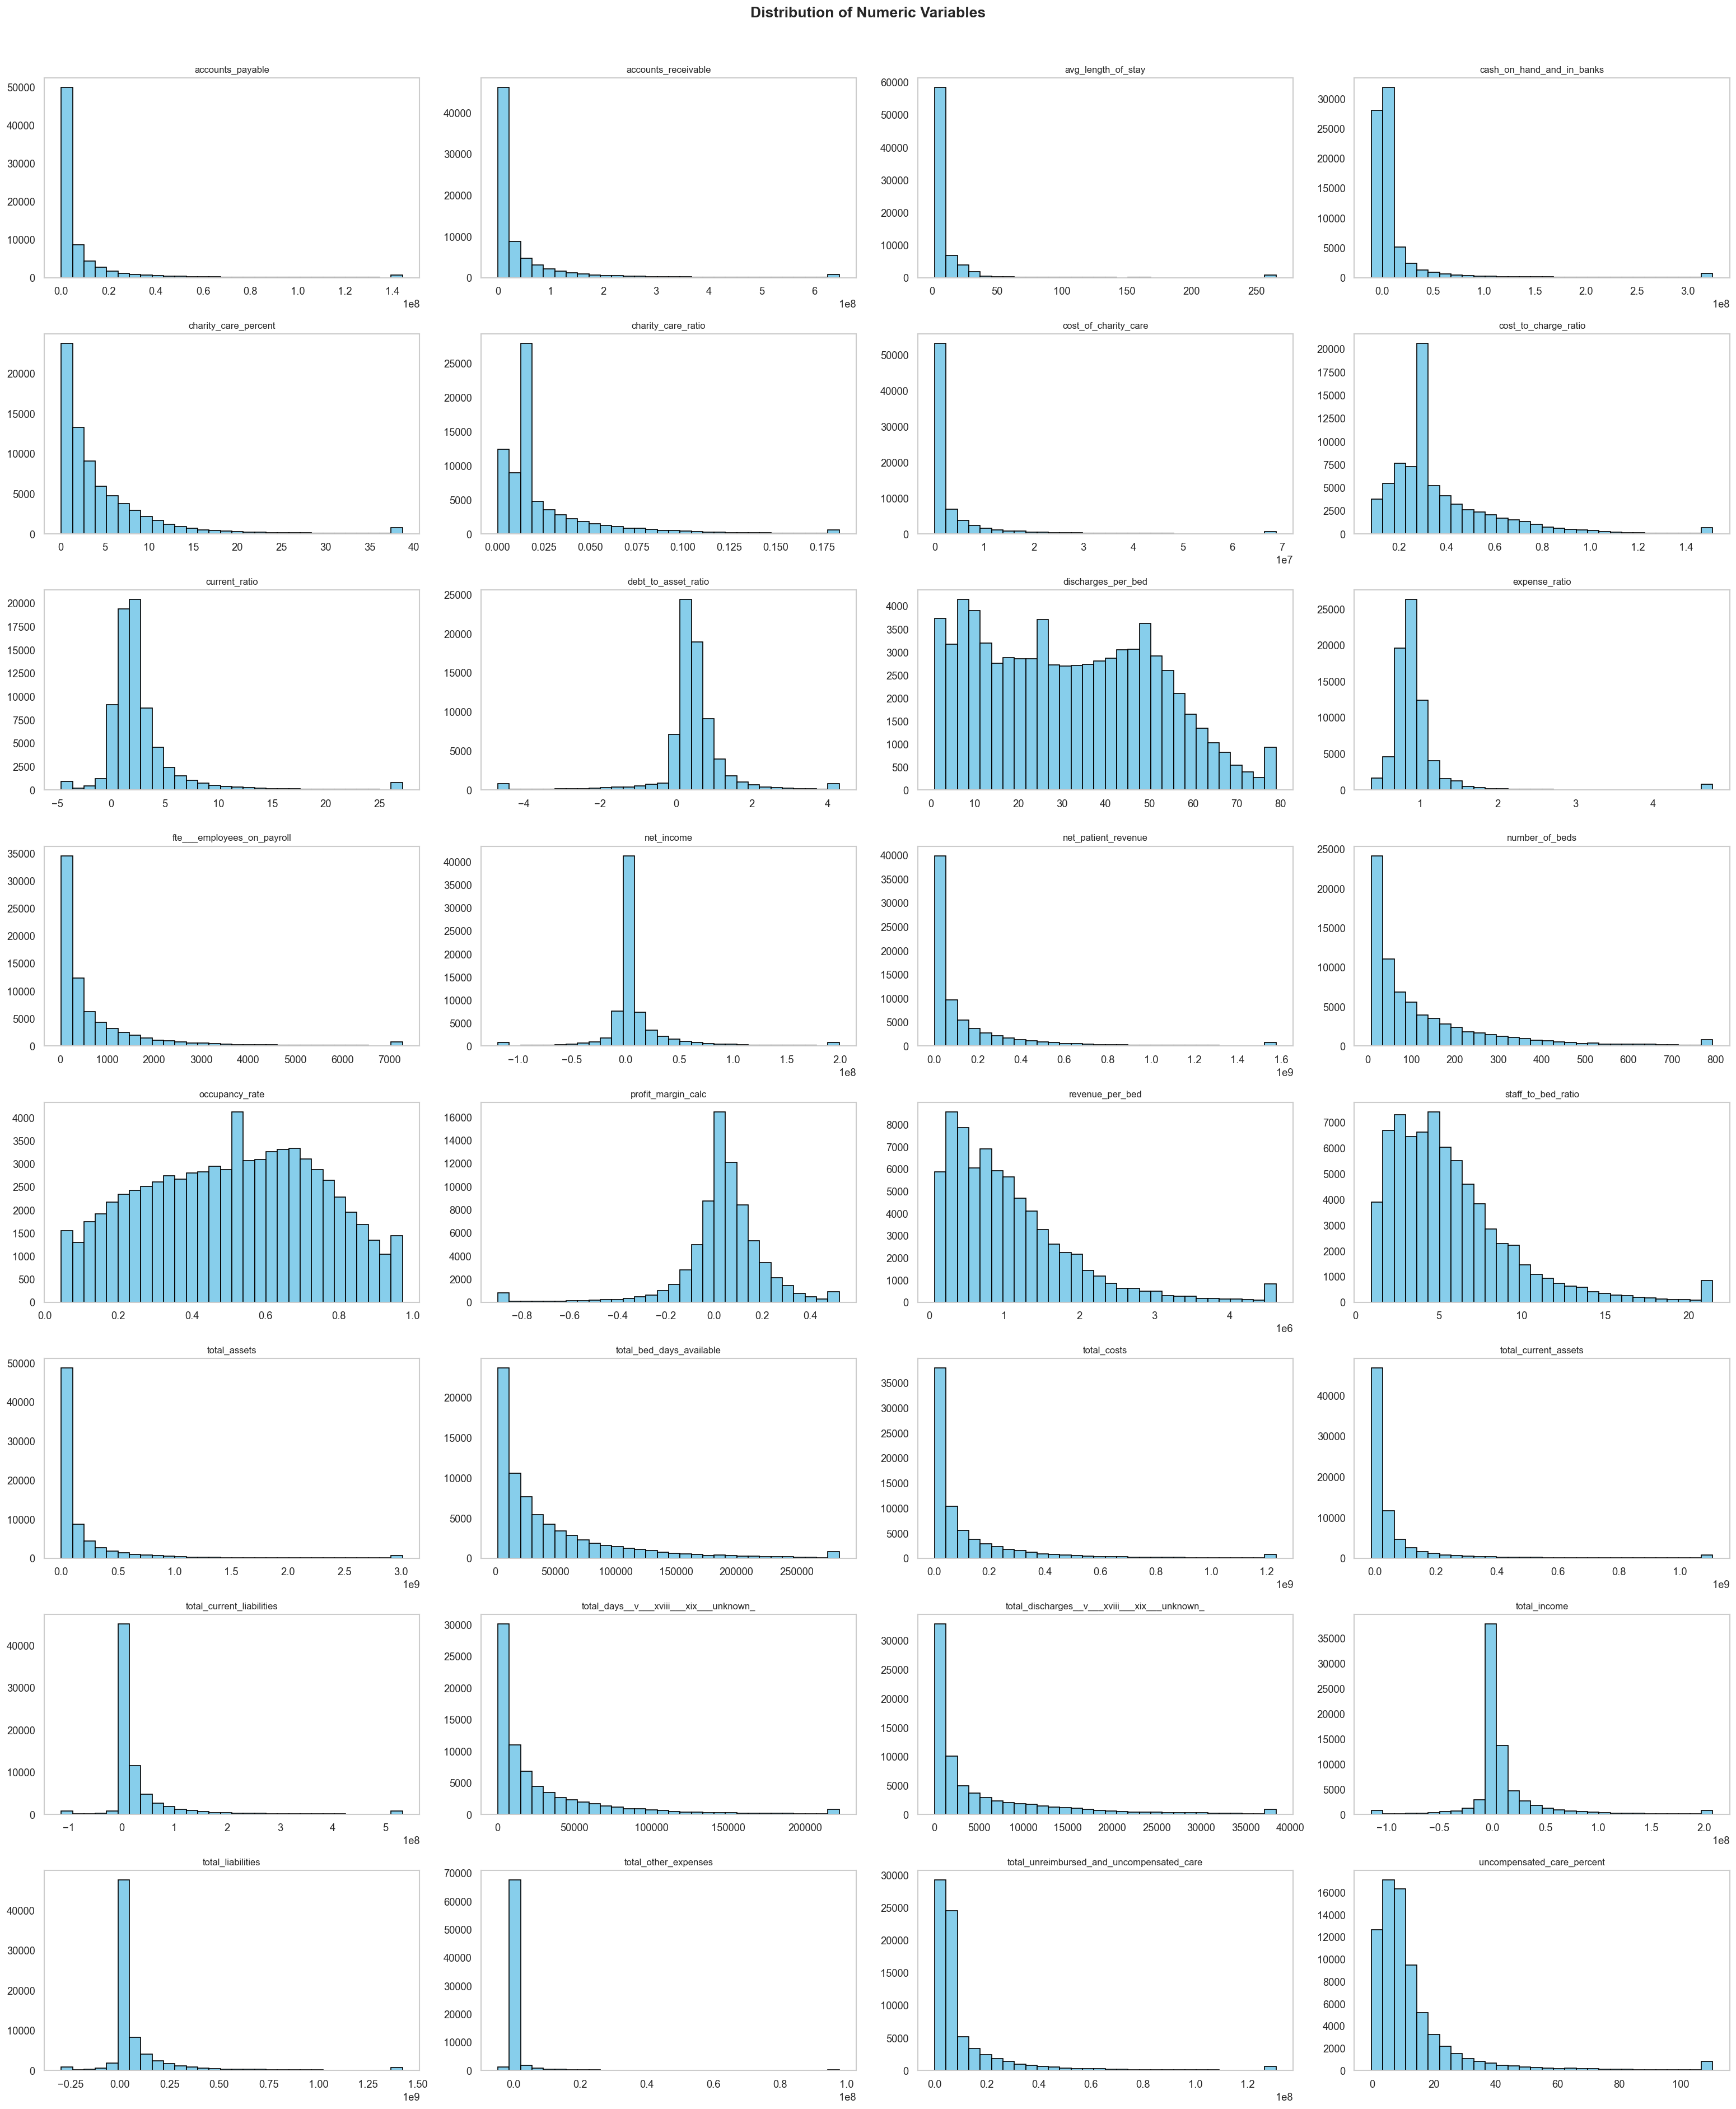

In [38]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['year', 'zip_code', 'medicare_cbsa_number'])

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(False)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of Numeric Variables", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

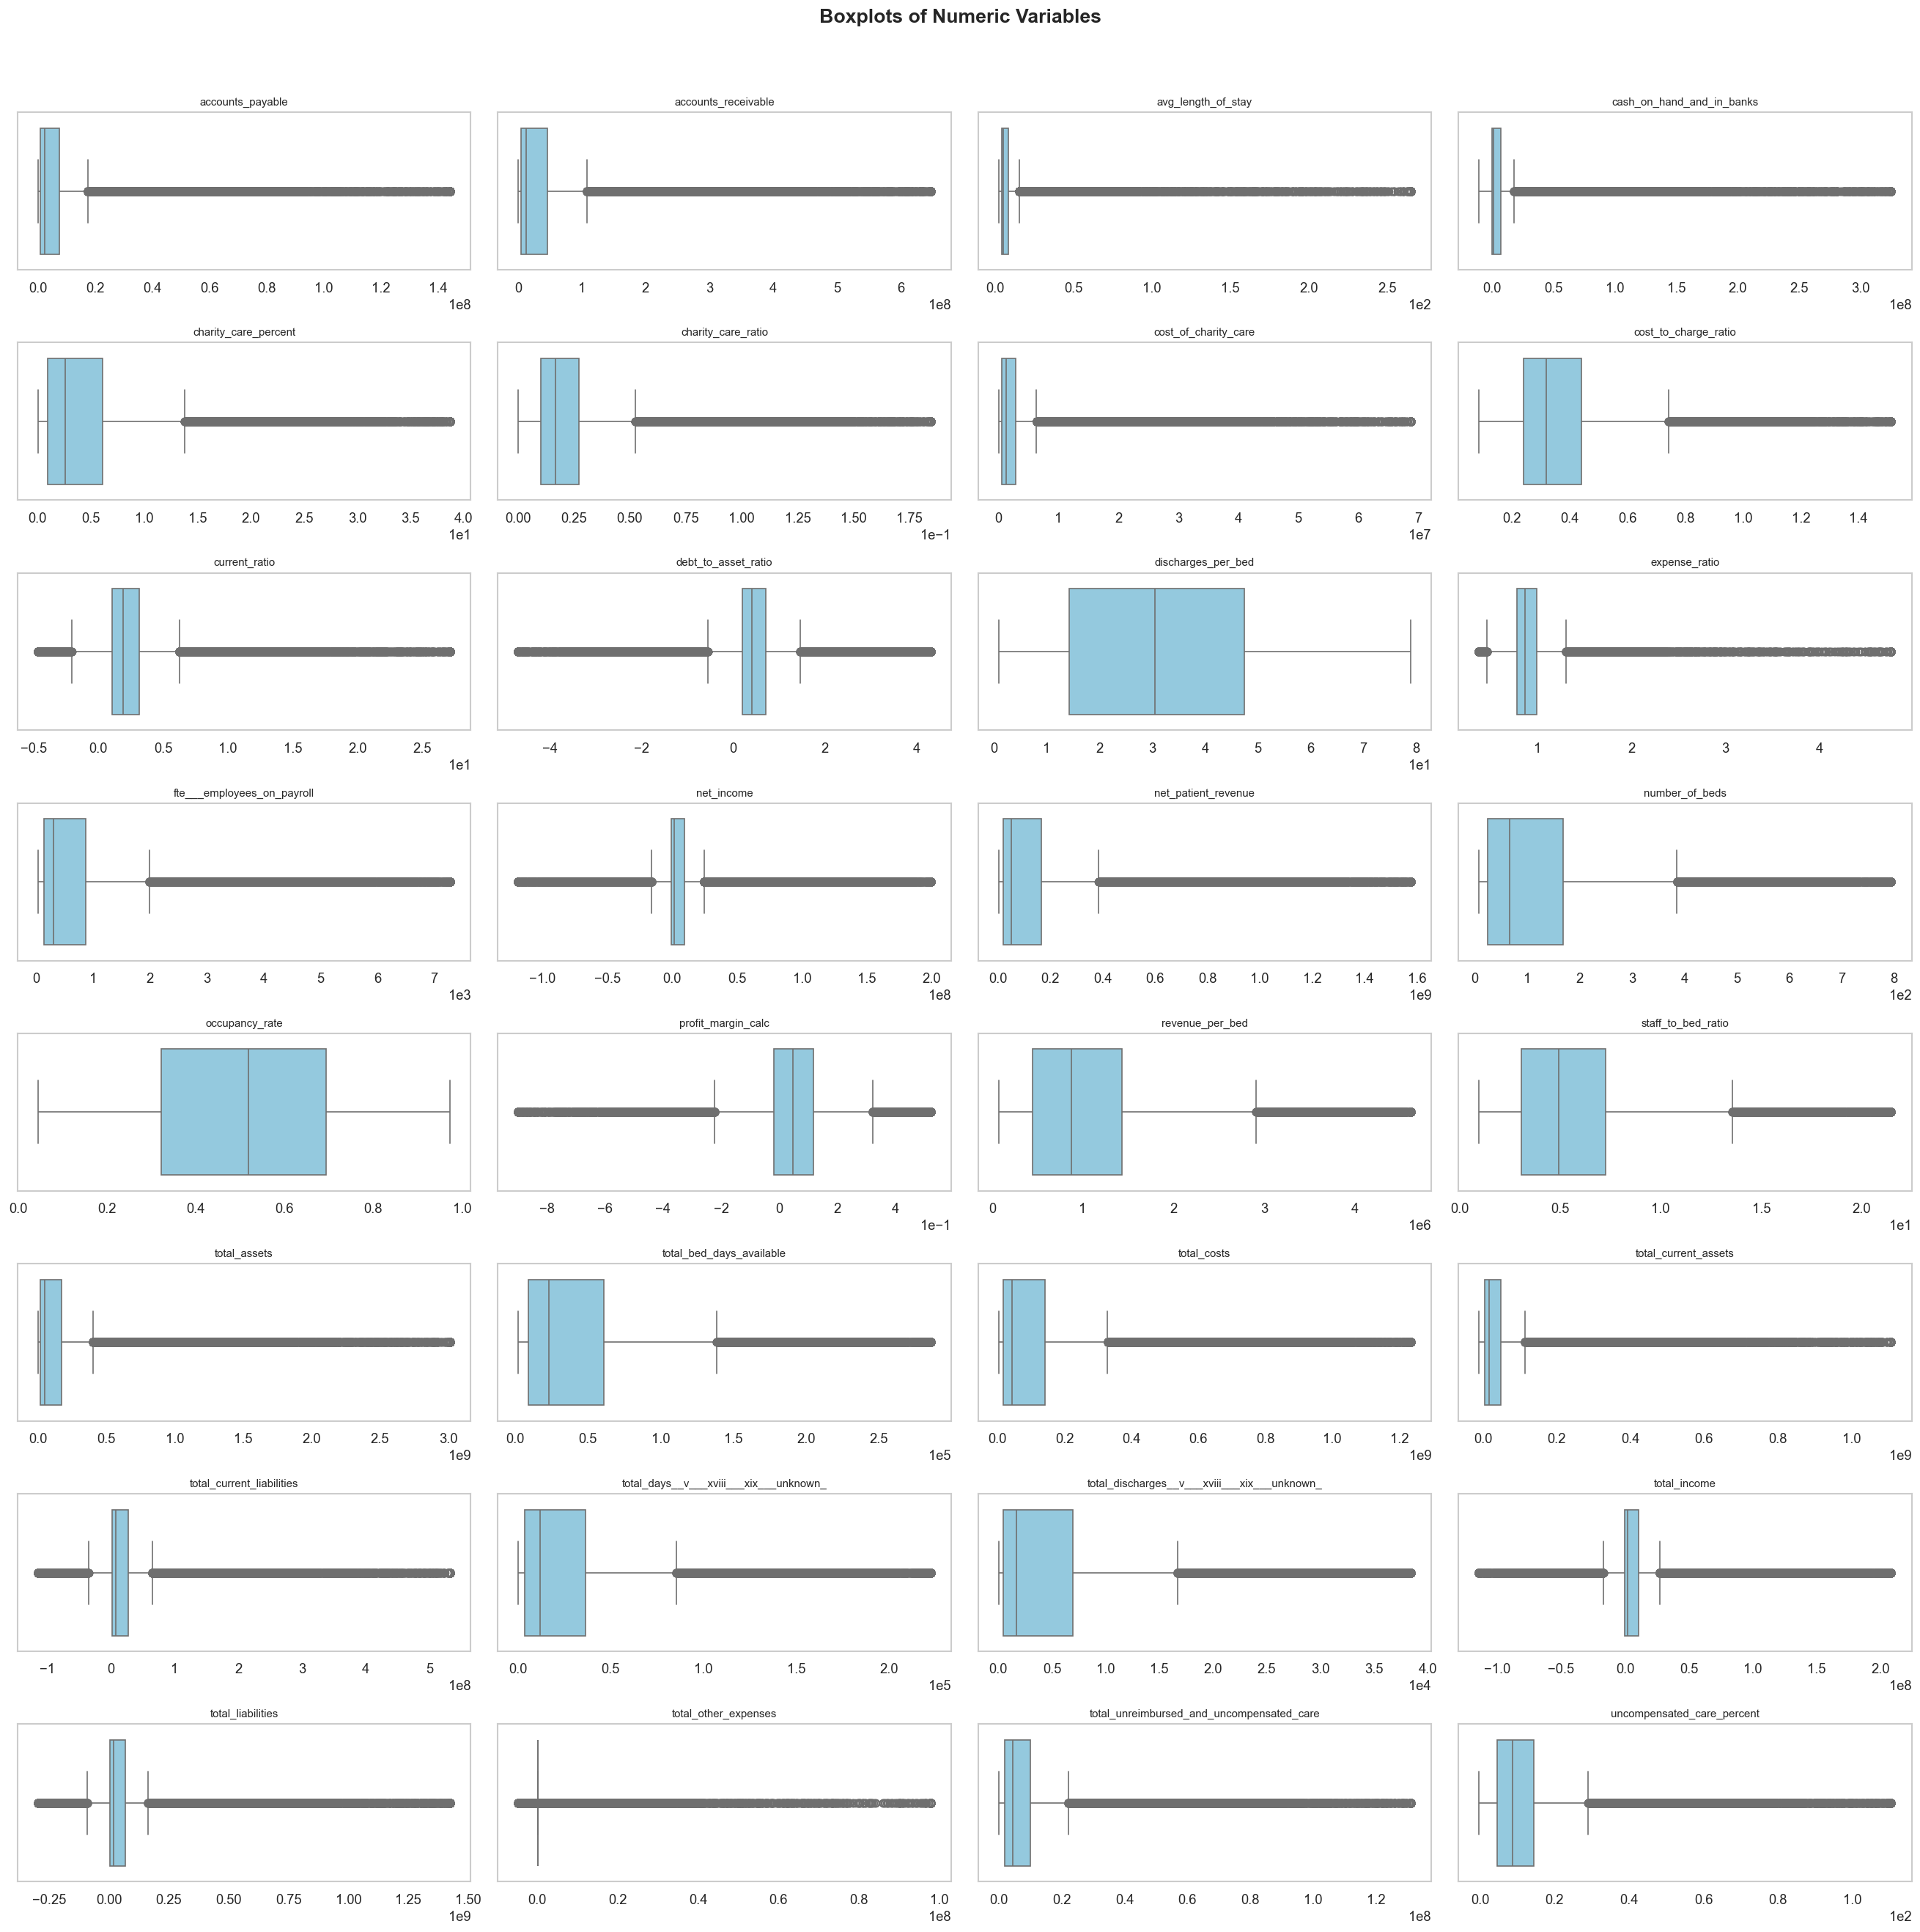

In [39]:
import math

# Select numeric columns except identifiers
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(
    ['year', 'zip_code', 'medicare_cbsa_number']
)

# Define grid size dynamically (e.g., 4 per row)
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

# Create one large figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 2.8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], color='skyblue', ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(False)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Boxplots of Numeric Variables", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

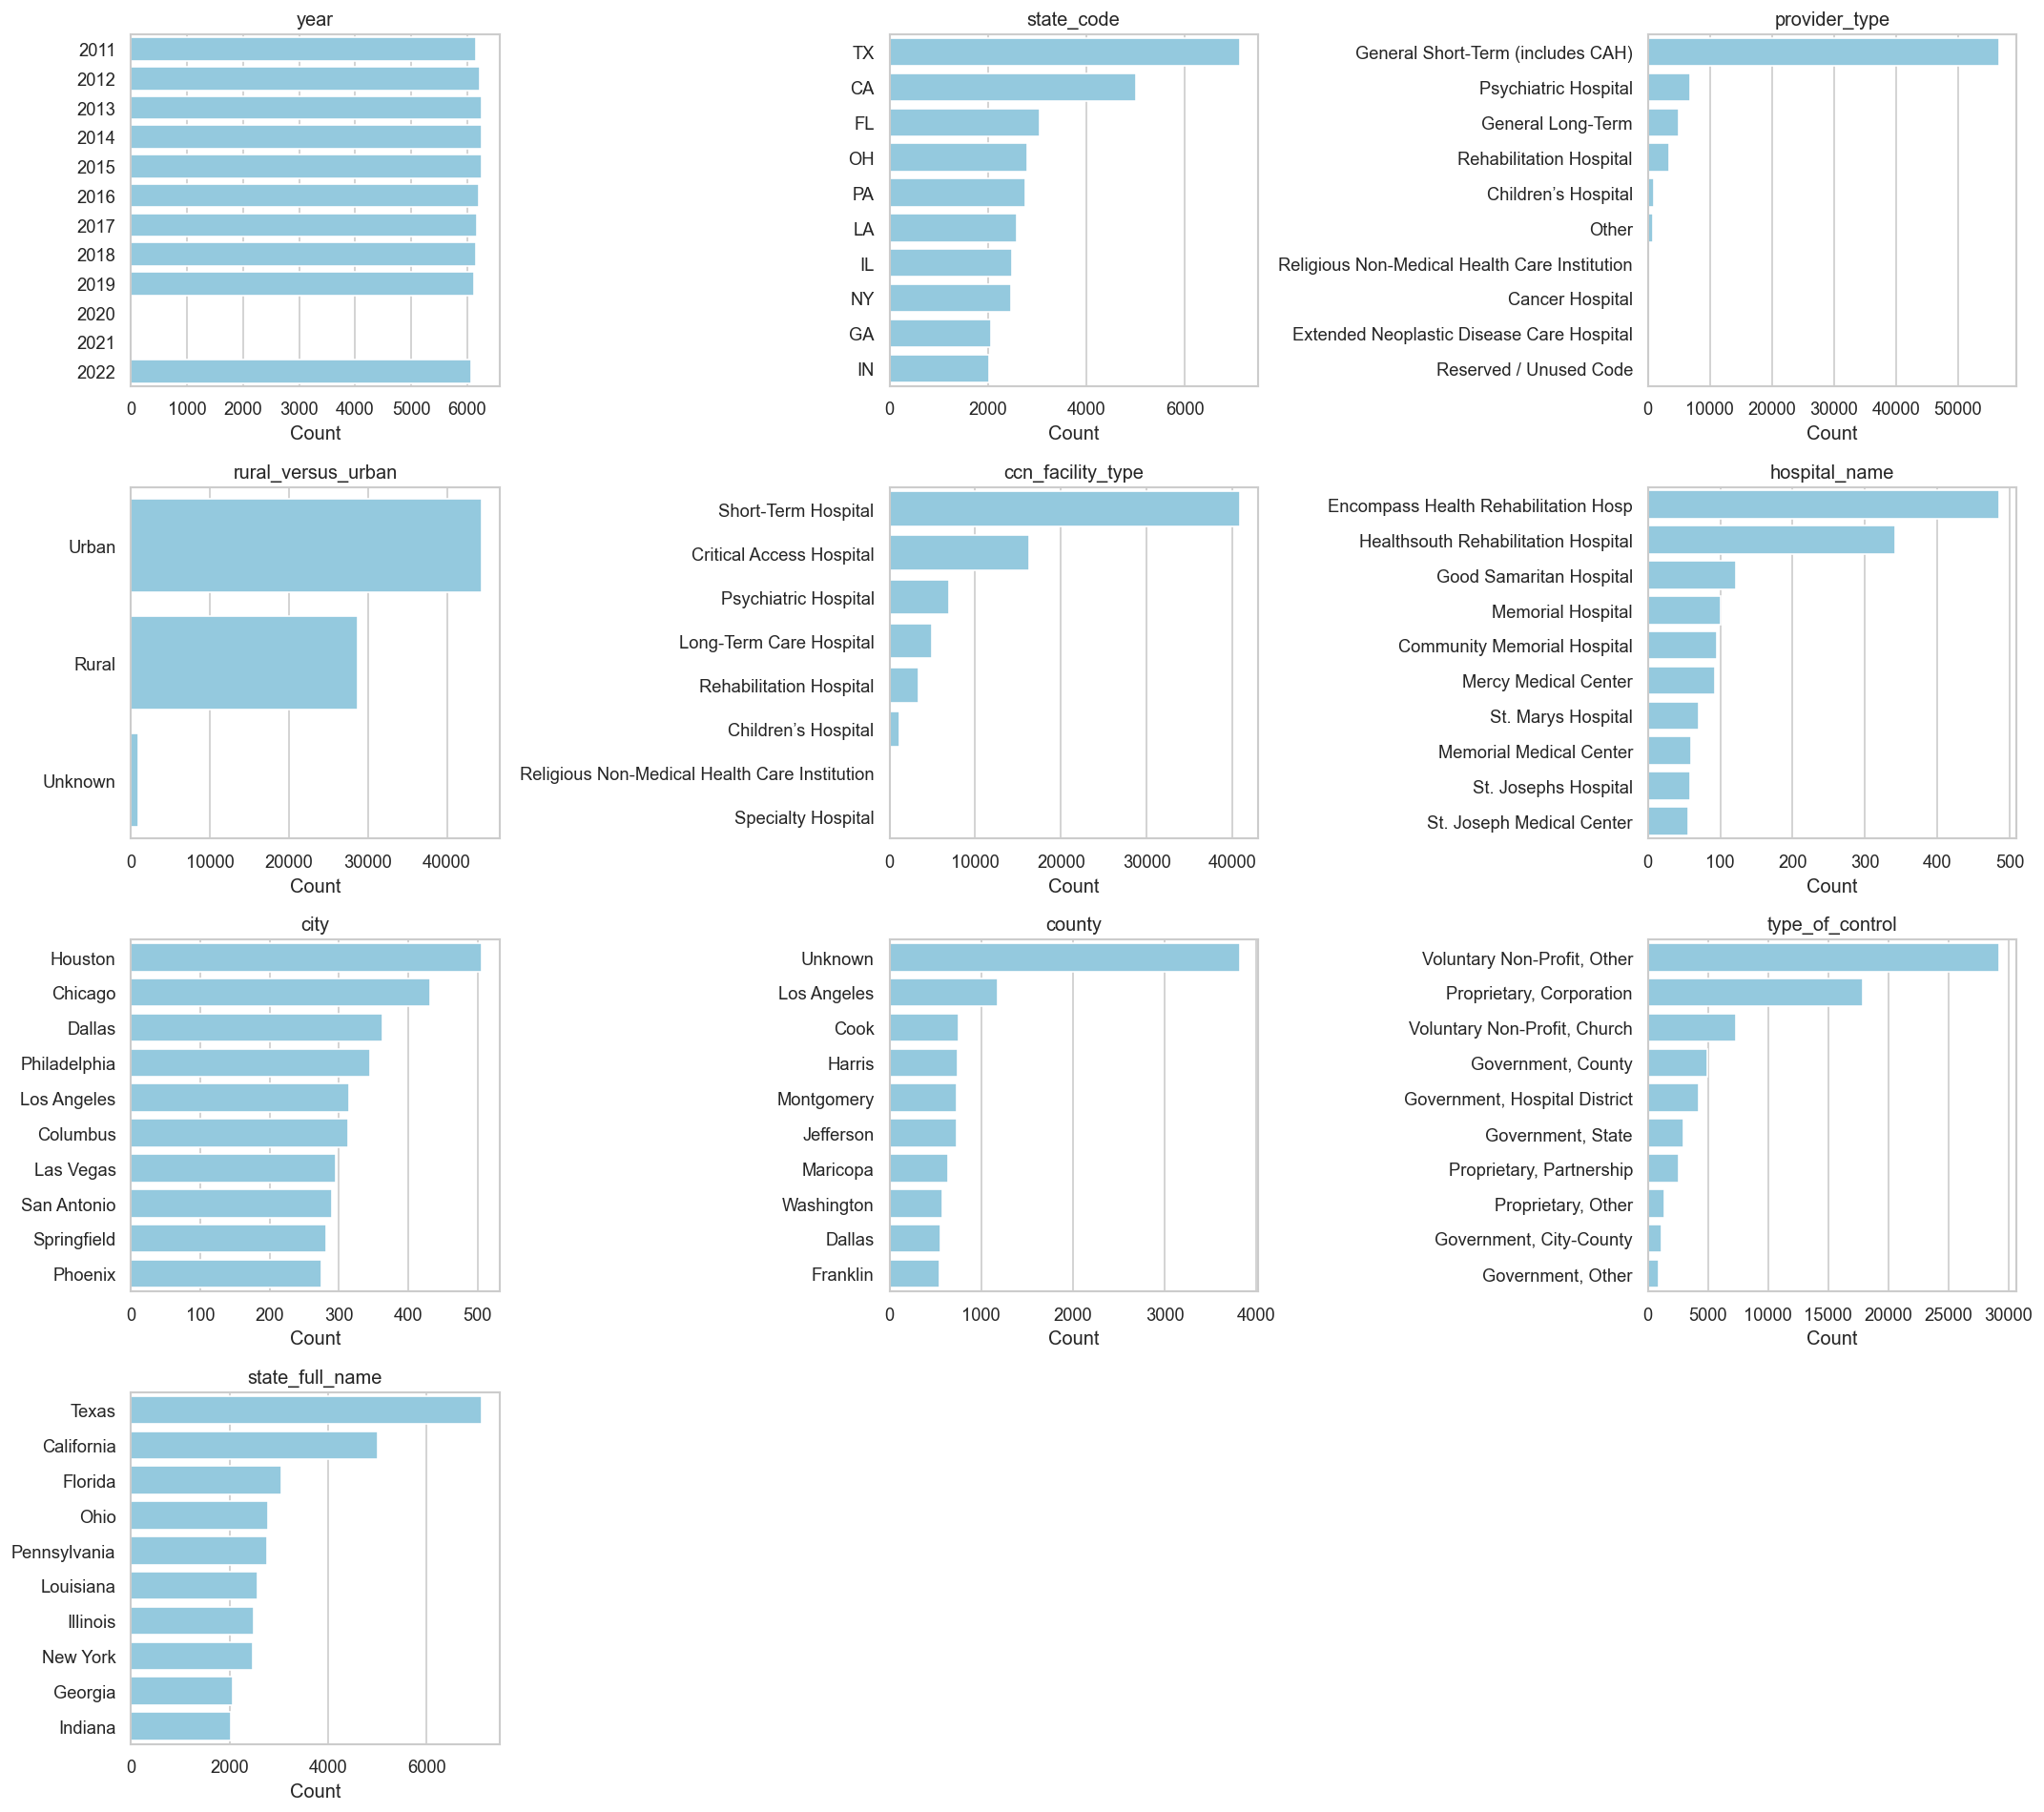

In [40]:
import math

cat_cols = df.select_dtypes(include=['object','category']).columns

if len(cat_cols) > 0:
    rows = math.ceil(len(cat_cols) / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        counts = df[col].value_counts().head(10)
        sns.barplot(x=counts.values, y=counts.index, ax=axes[i], color='skyblue')
        axes[i].set_title(col)
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel('')

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found.")

Missing Values Check

In [41]:
missing_summary = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).round(2)
display(pd.concat([missing_summary.rename("Missing_Count"),
                   missing_pct.rename("Missing_%")], axis=1).head(10))

Missing_Count  Missing_%
year                                                      0        0.0
state_code                                                0        0.0
provider_type                                             0        0.0
rural_versus_urban                                        0        0.0
ccn_facility_type                                         0        0.0
number_of_beds                                            0        0.0
total_bed_days_available                                  0        0.0
occupancy_rate                                            0        0.0
total_discharges__v___xviii___xix___unknown_              0        0.0
total_days__v___xviii___xix___unknown_                    0        0.0

#### Univariate Analysis Summary

**1. Data Completeness**

* All 44 variables are complete with no missing values.
* Cleaning and imputation were successful; the dataset is fully ready for analysis.

**2. Numerical Variables**

**Central Tendency and Spread**

* Continuous variables show high right skewness, typical for financial and operational data.
* Key monetary variables (`net_patient_revenue`, `total_costs`, `total_assets`) exhibit large spreads, reflecting scale differences among hospitals.
* Ratios such as `profit_margin_calc`, `expense_ratio`, and `debt_to_asset_ratio` cluster near realistic economic ranges (0–1) but contain some outliers.

**Distribution Insights**

* `occupancy_rate`: Uniformly distributed with a peak between 0.5 and 0.7, suggesting average bed utilization of 50–70%.
* `number_of_beds`: Right-skewed; most hospitals have fewer than 200 beds, with a small number exceeding 500.
* `net_income` and `profit_margin_calc`: Centered near zero with both positive and negative tails, showing variation in profitability.
* `avg_length_of_stay`: Typically under 10 days; longer stays correspond to specialized long-term facilities.
* Financial ratios (`expense_ratio`, `current_ratio`, `debt_to_asset_ratio`): Some extreme outliers indicate high leverage or exceptional liquidity.
* Charity and uncompensated care metrics: Generally below 15%, with a few extreme values above 100% indicating reporting anomalies or extraordinary charity cases.

**Outliers**

* Boxplots confirm extreme right-tail outliers in cost, revenue, and asset variables.
* Outliers represent large multi-state hospital systems; retained to preserve dataset representativeness.

**3. Categorical Variables**

**Facility and Ownership**

* Facility Type: Majority are Short-Term Hospitals and Critical Access Hospitals; Rehabilitation and Psychiatric facilities form smaller proportions.
* Type of Control: Voluntary Non-Profit hospitals dominate, followed by Proprietary Corporations and local government facilities.

**Geographic Patterns**

* Urban vs Rural: Approximately 60% of hospitals are urban and 40% rural, reflecting U.S. population distribution.
* Top States: Texas, California, Florida, and Ohio have the highest hospital counts.
* Counties: A few, such as Los Angeles, Cook, and Harris, contain the largest concentrations of hospitals.
* Cities: Houston, Chicago, and Dallas lead in hospital density.

**4. Overall Observations**

* The dataset displays strong geographic and operational diversity.
* Most numeric variables are right-skewed and may benefit from log or z-score normalization before modeling.
* No missing or invalid values remain, and categorical variables are clearly standardized and mapped.


**2. Bi-Variate Analysis**

In [42]:
sns.set(style="whitegrid", rc={"figure.dpi":120})

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print(f"Numeric Columns: {len(num_cols)} | Categorical Columns: {len(cat_cols)}")

Numeric Columns: 34 | Categorical Columns: 10


2.1 Correlation Heatmap


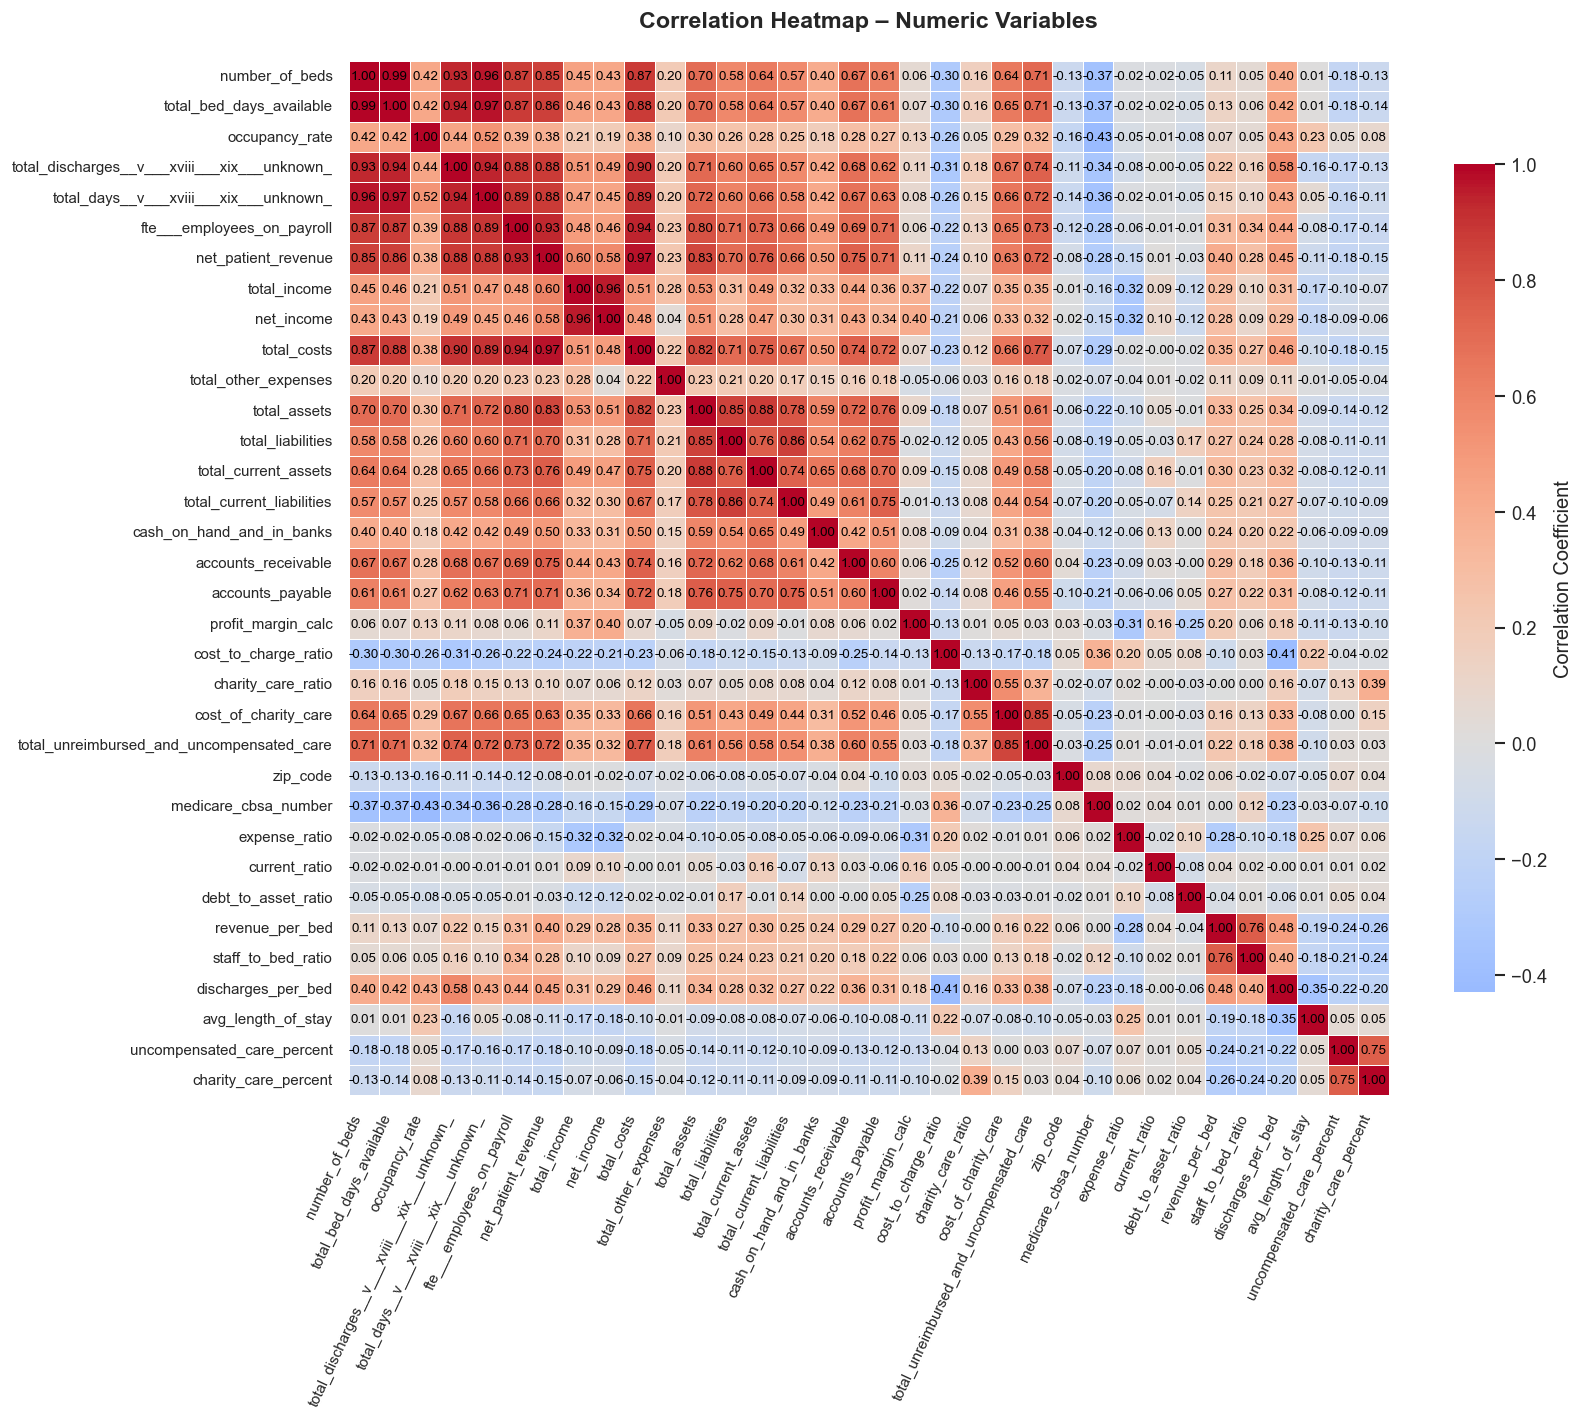

In [43]:
# Compute correlation
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,          
    fmt=".2f",               
    linewidths=0.3,
    linecolor='white',
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot_kws={"size": 8, "color": "black"}  # readable numbers
)

# Improve readability
plt.xticks(rotation=65, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Heatmap – Numeric Variables", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


2.2 Numerical vs Numerical Variables

<Figure size 2400x1440 with 0 Axes>

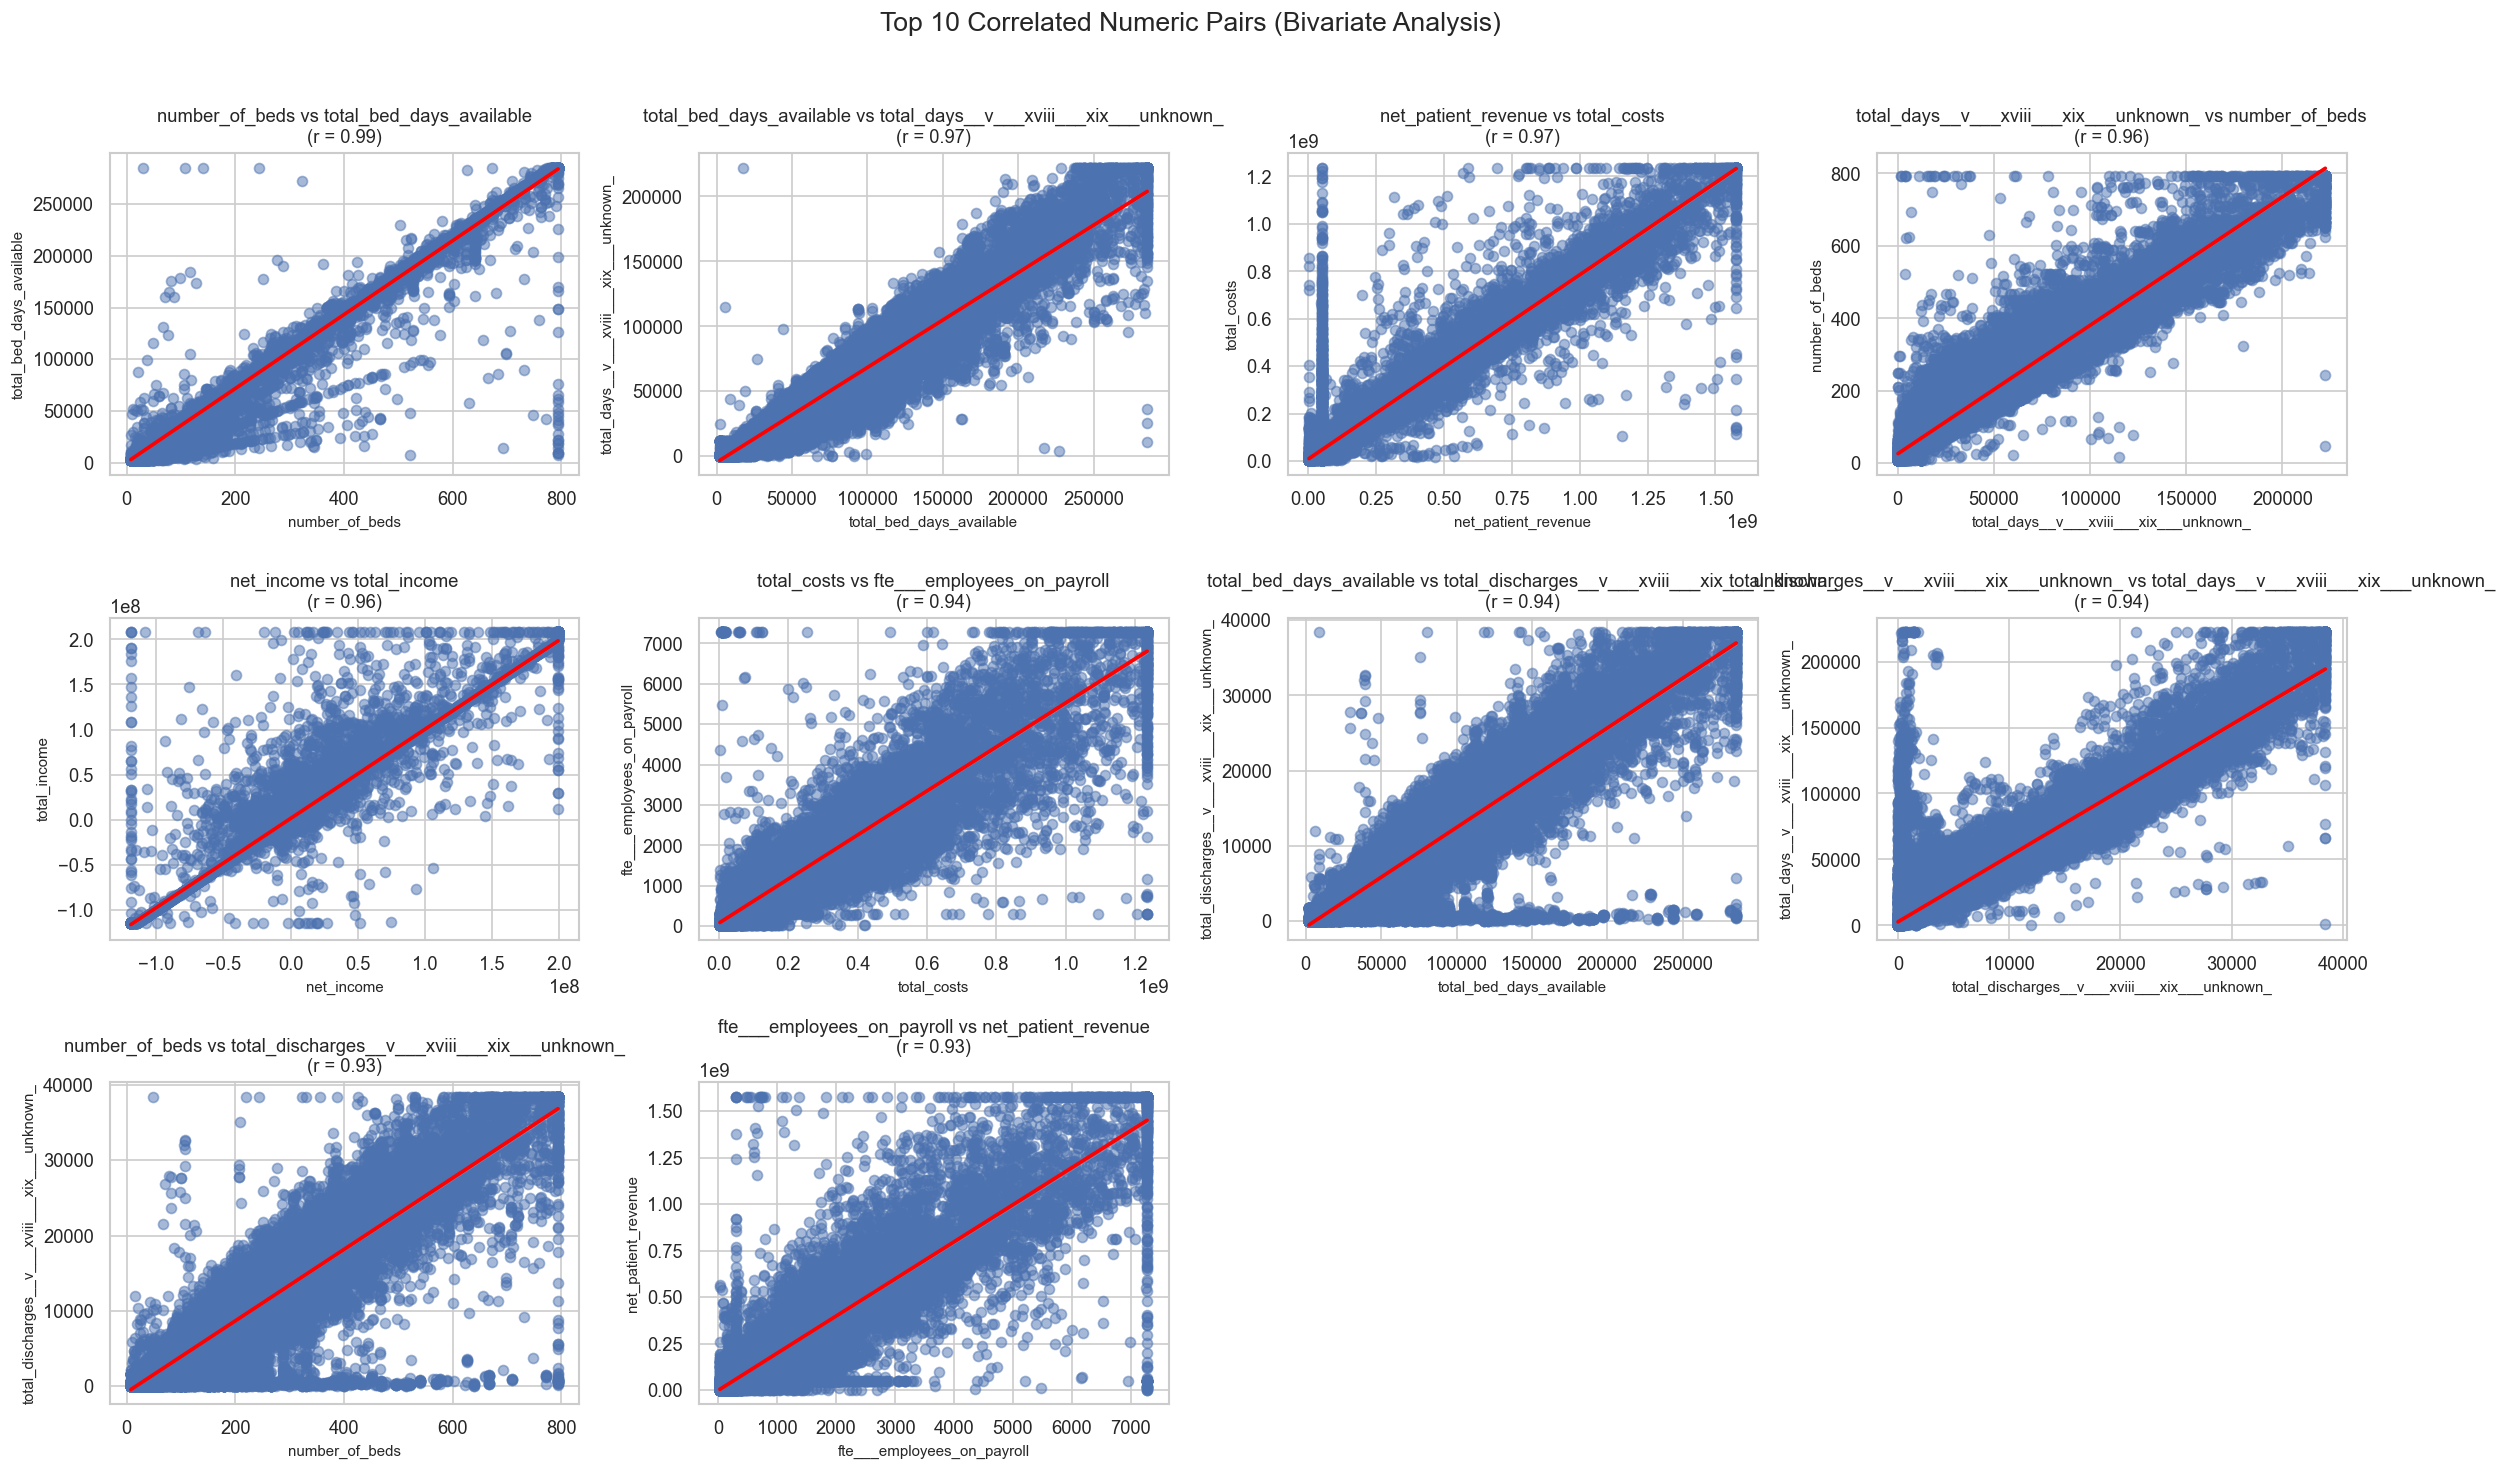

In [44]:
import math

# Numeric columns only (filter out IDs)
num_cols = [c for c in df.select_dtypes(include=['float64', 'int64']).columns 
            if c not in ['zip_code', 'medicare_cbsa_number', 'year']]

# Compute correlation matrix
corr = df[num_cols].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

# Keep top 10 correlated pairs (excluding perfect 1.0)
top_corr = corr[(corr < 1)].head(10)
top_pairs = top_corr.index.tolist()

# Plot settings
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))

rows = math.ceil(len(top_pairs) / 4)

# Create subplots grid
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))
axes = axes.flatten()

for i, (x, y) in enumerate(top_pairs):
    sns.regplot(data=df, x=x, y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[i])
    r = df[x].corr(df[y])
    axes[i].set_title(f"{x} vs {y}\n(r = {r:.2f})", fontsize=11)
    axes[i].set_xlabel(x, fontsize=9)
    axes[i].set_ylabel(y, fontsize=9)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 10 Correlated Numeric Pairs (Bivariate Analysis)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

3. Numerical vs Categorical

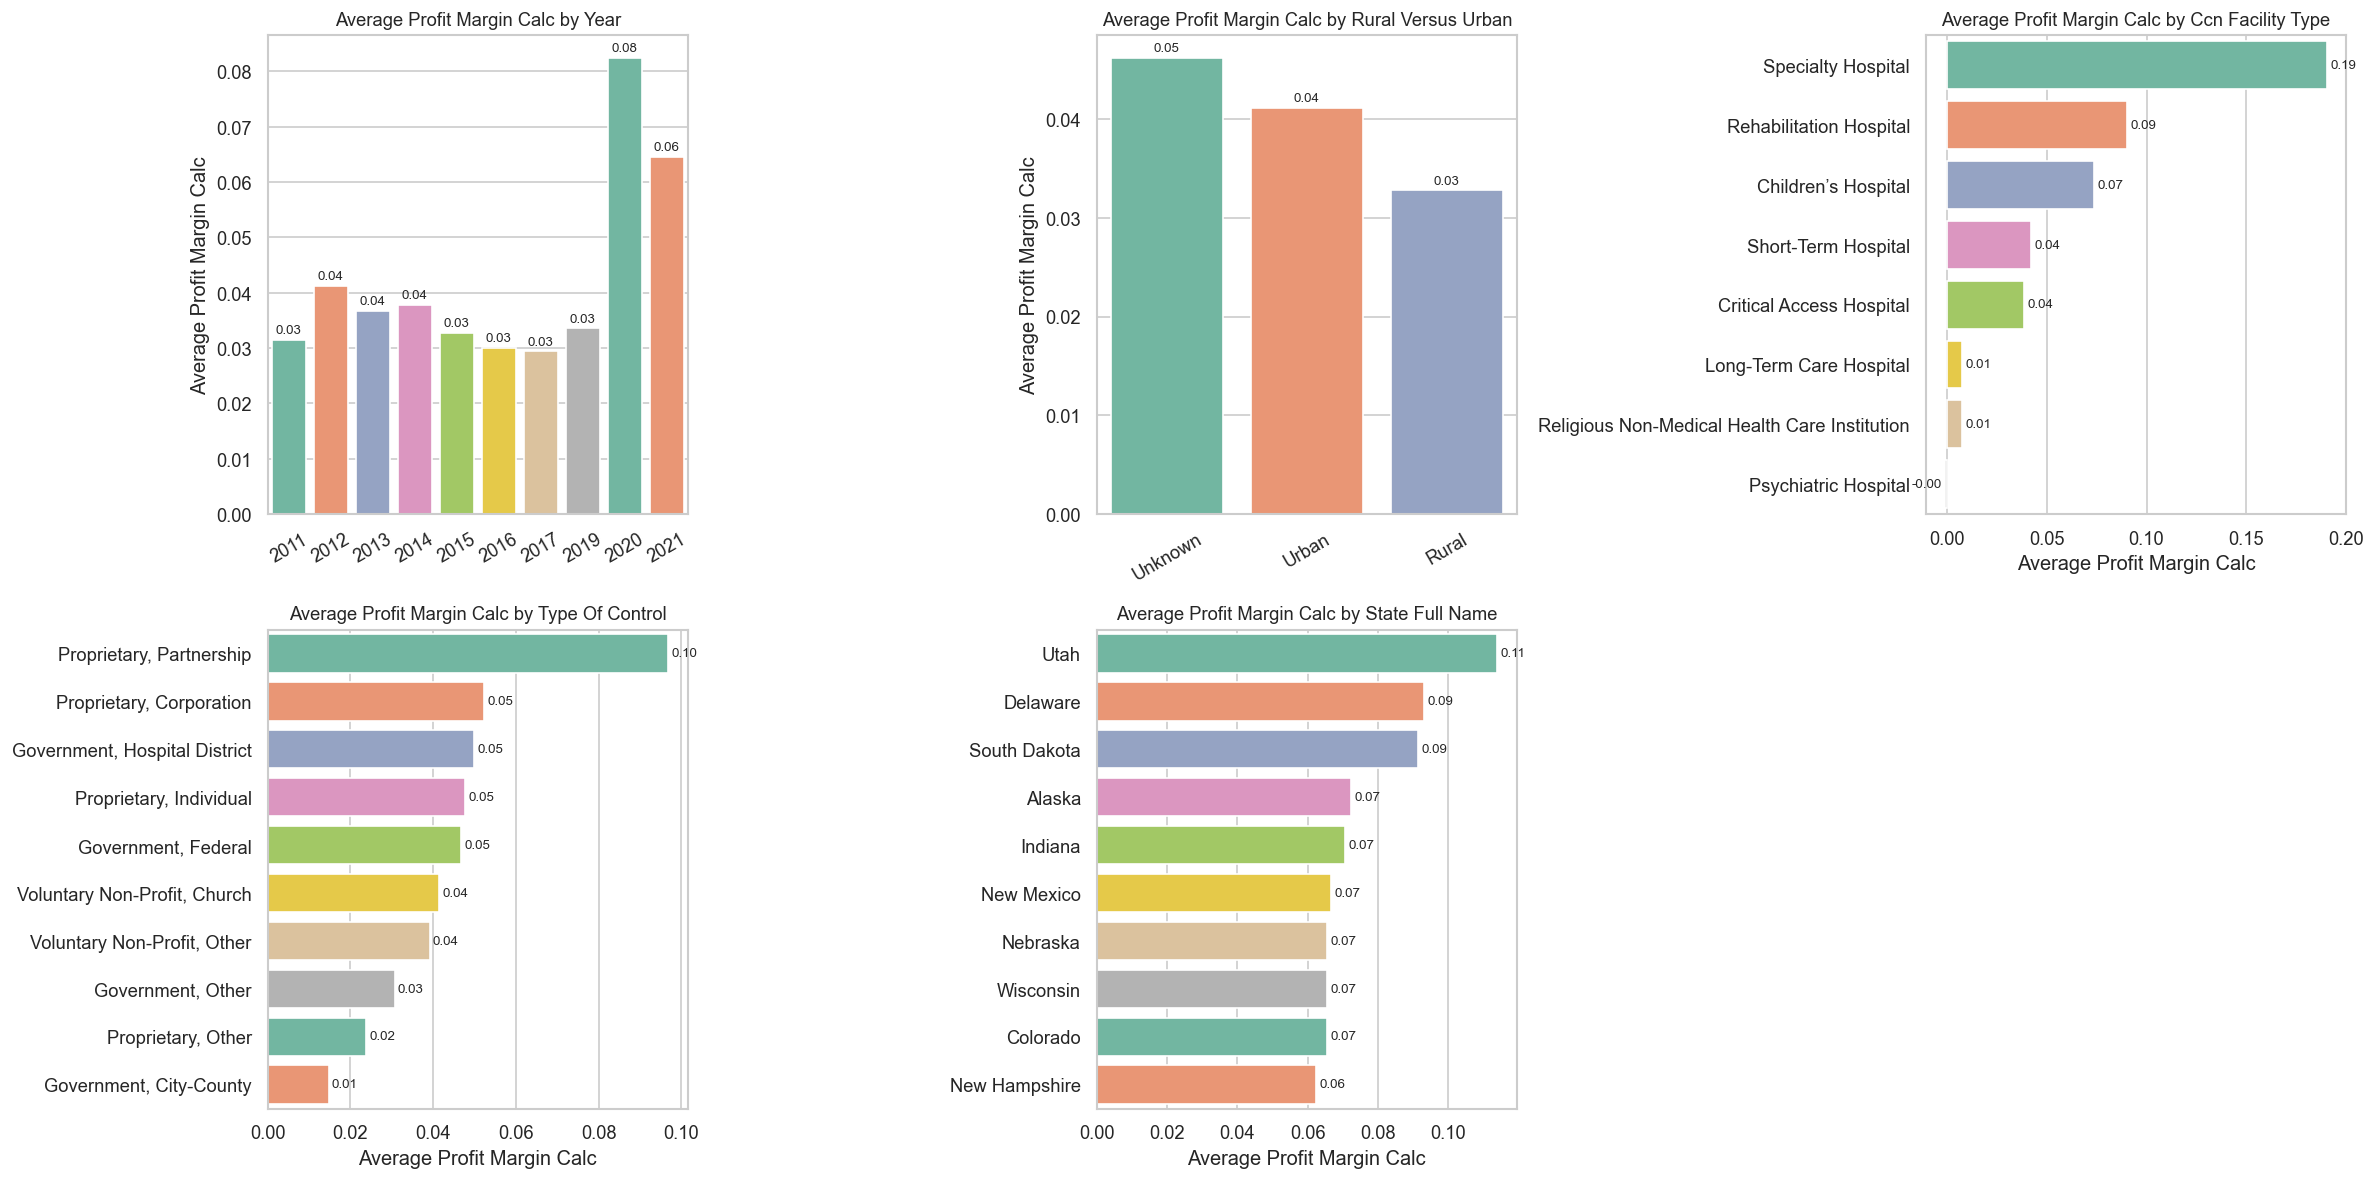

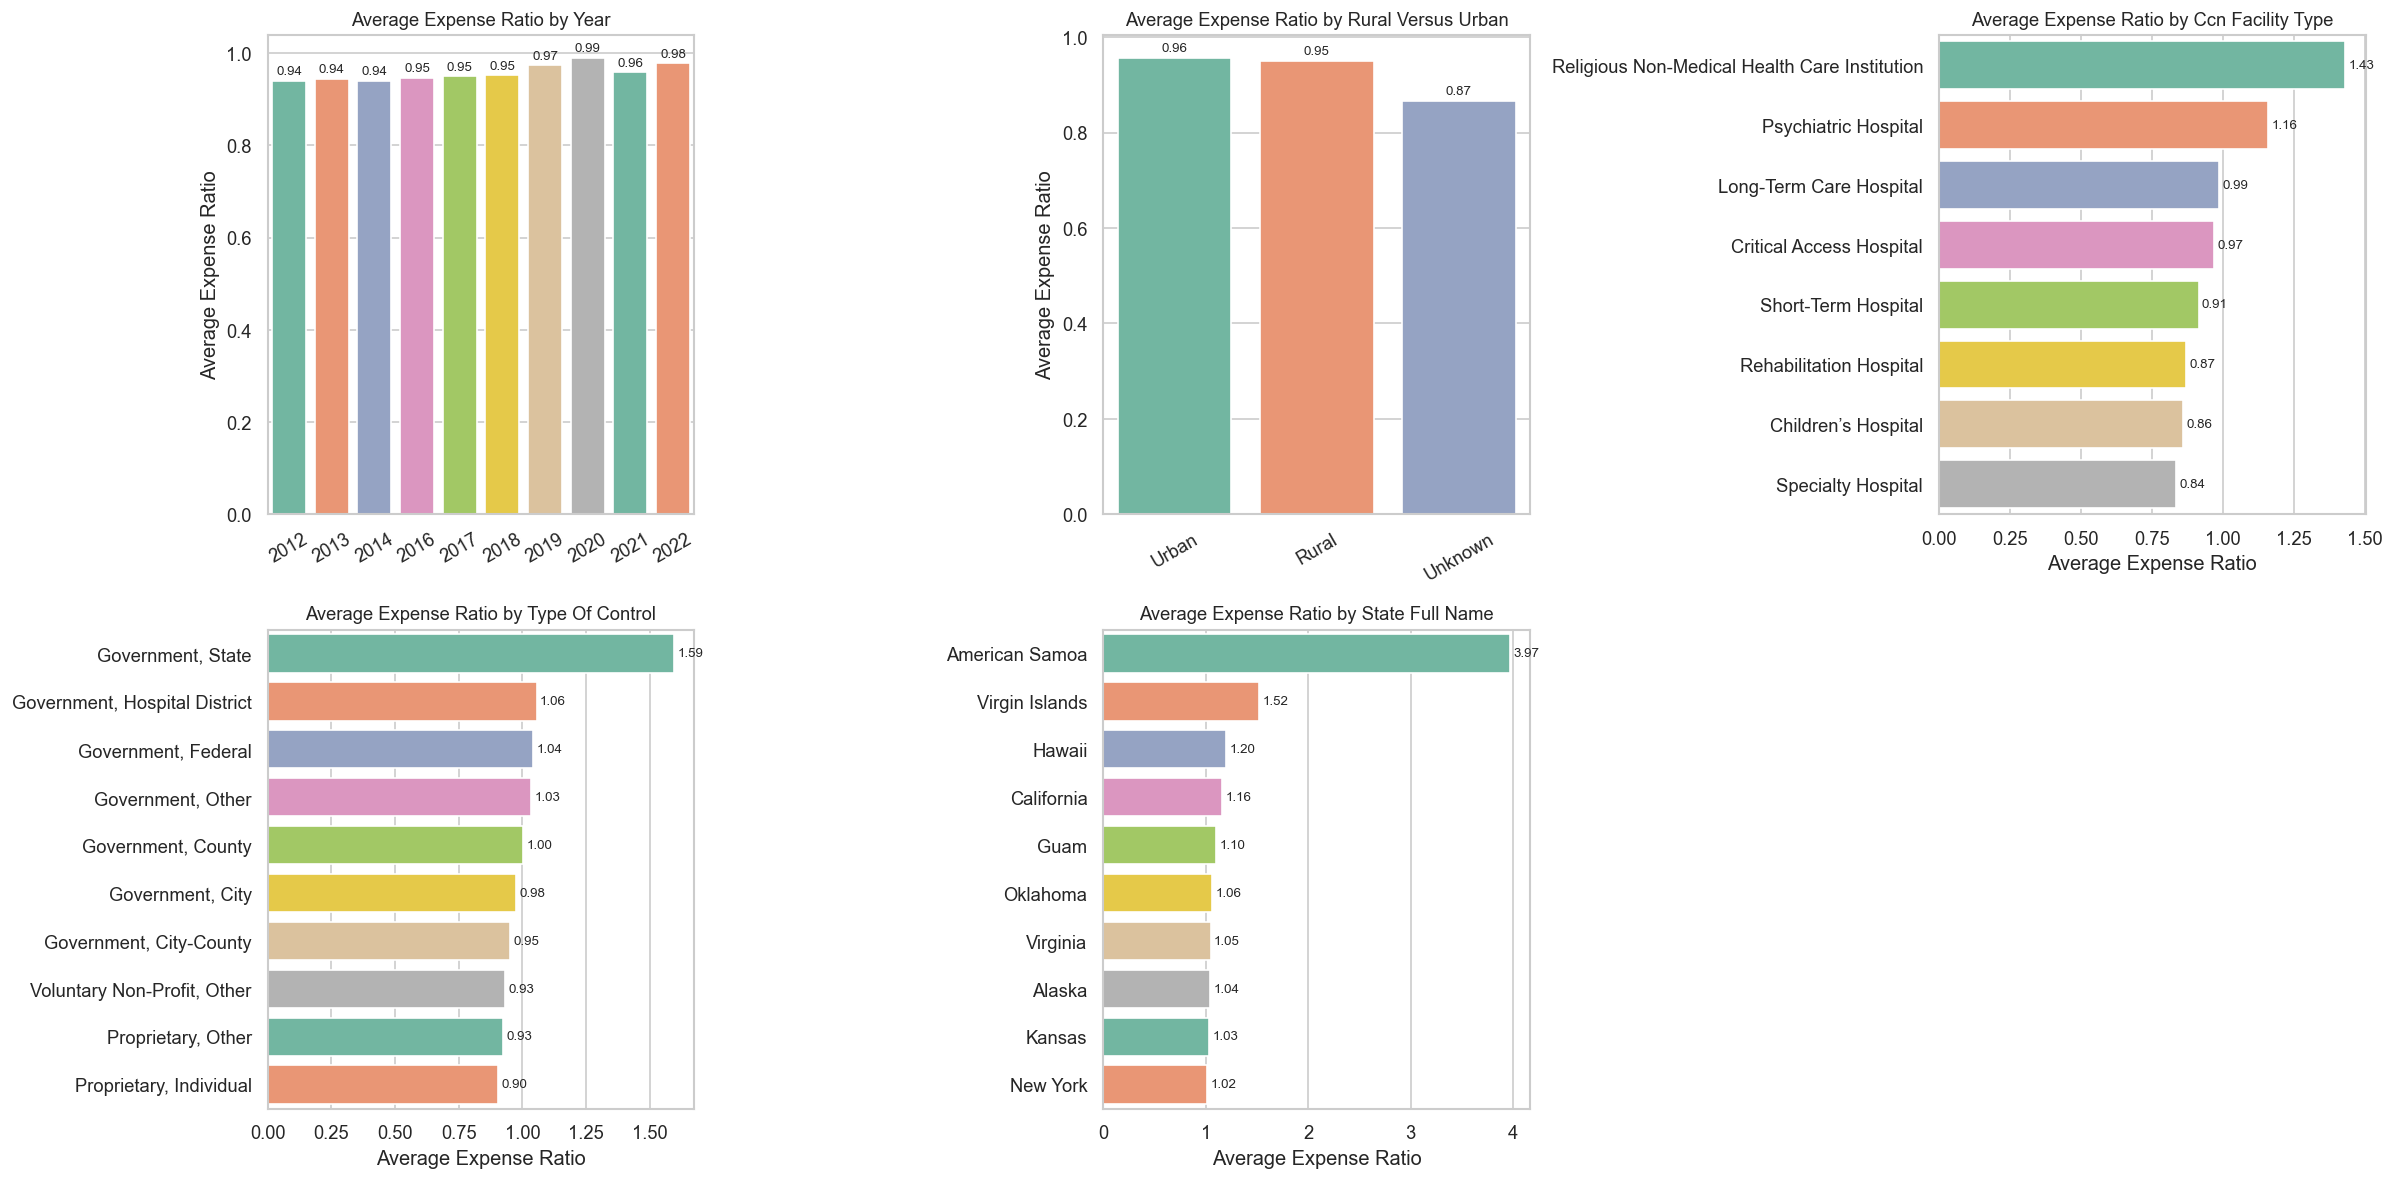

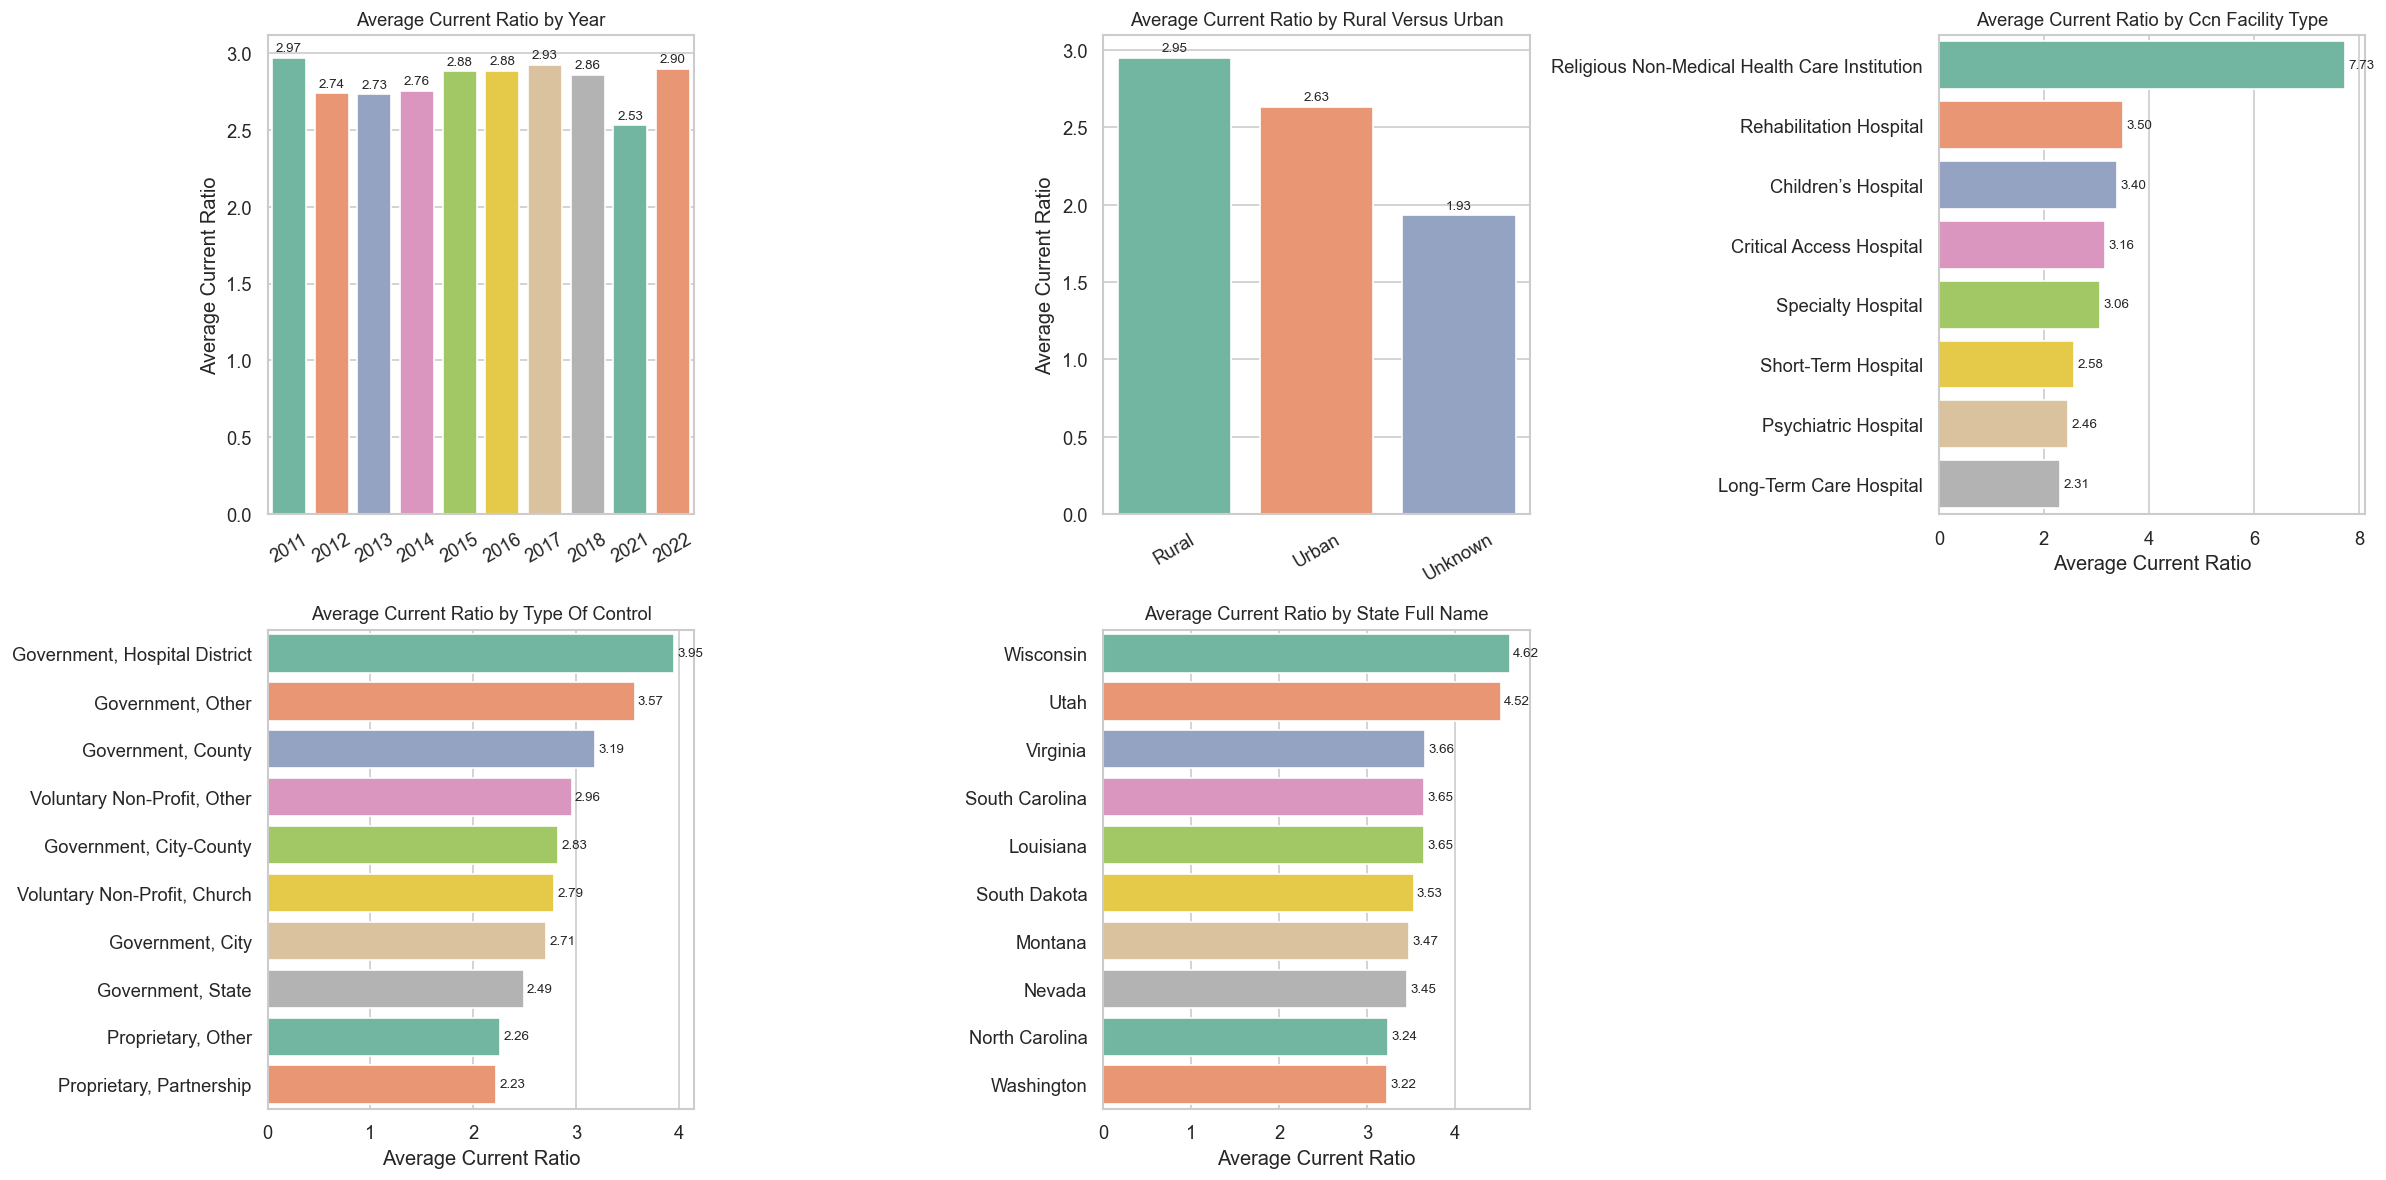

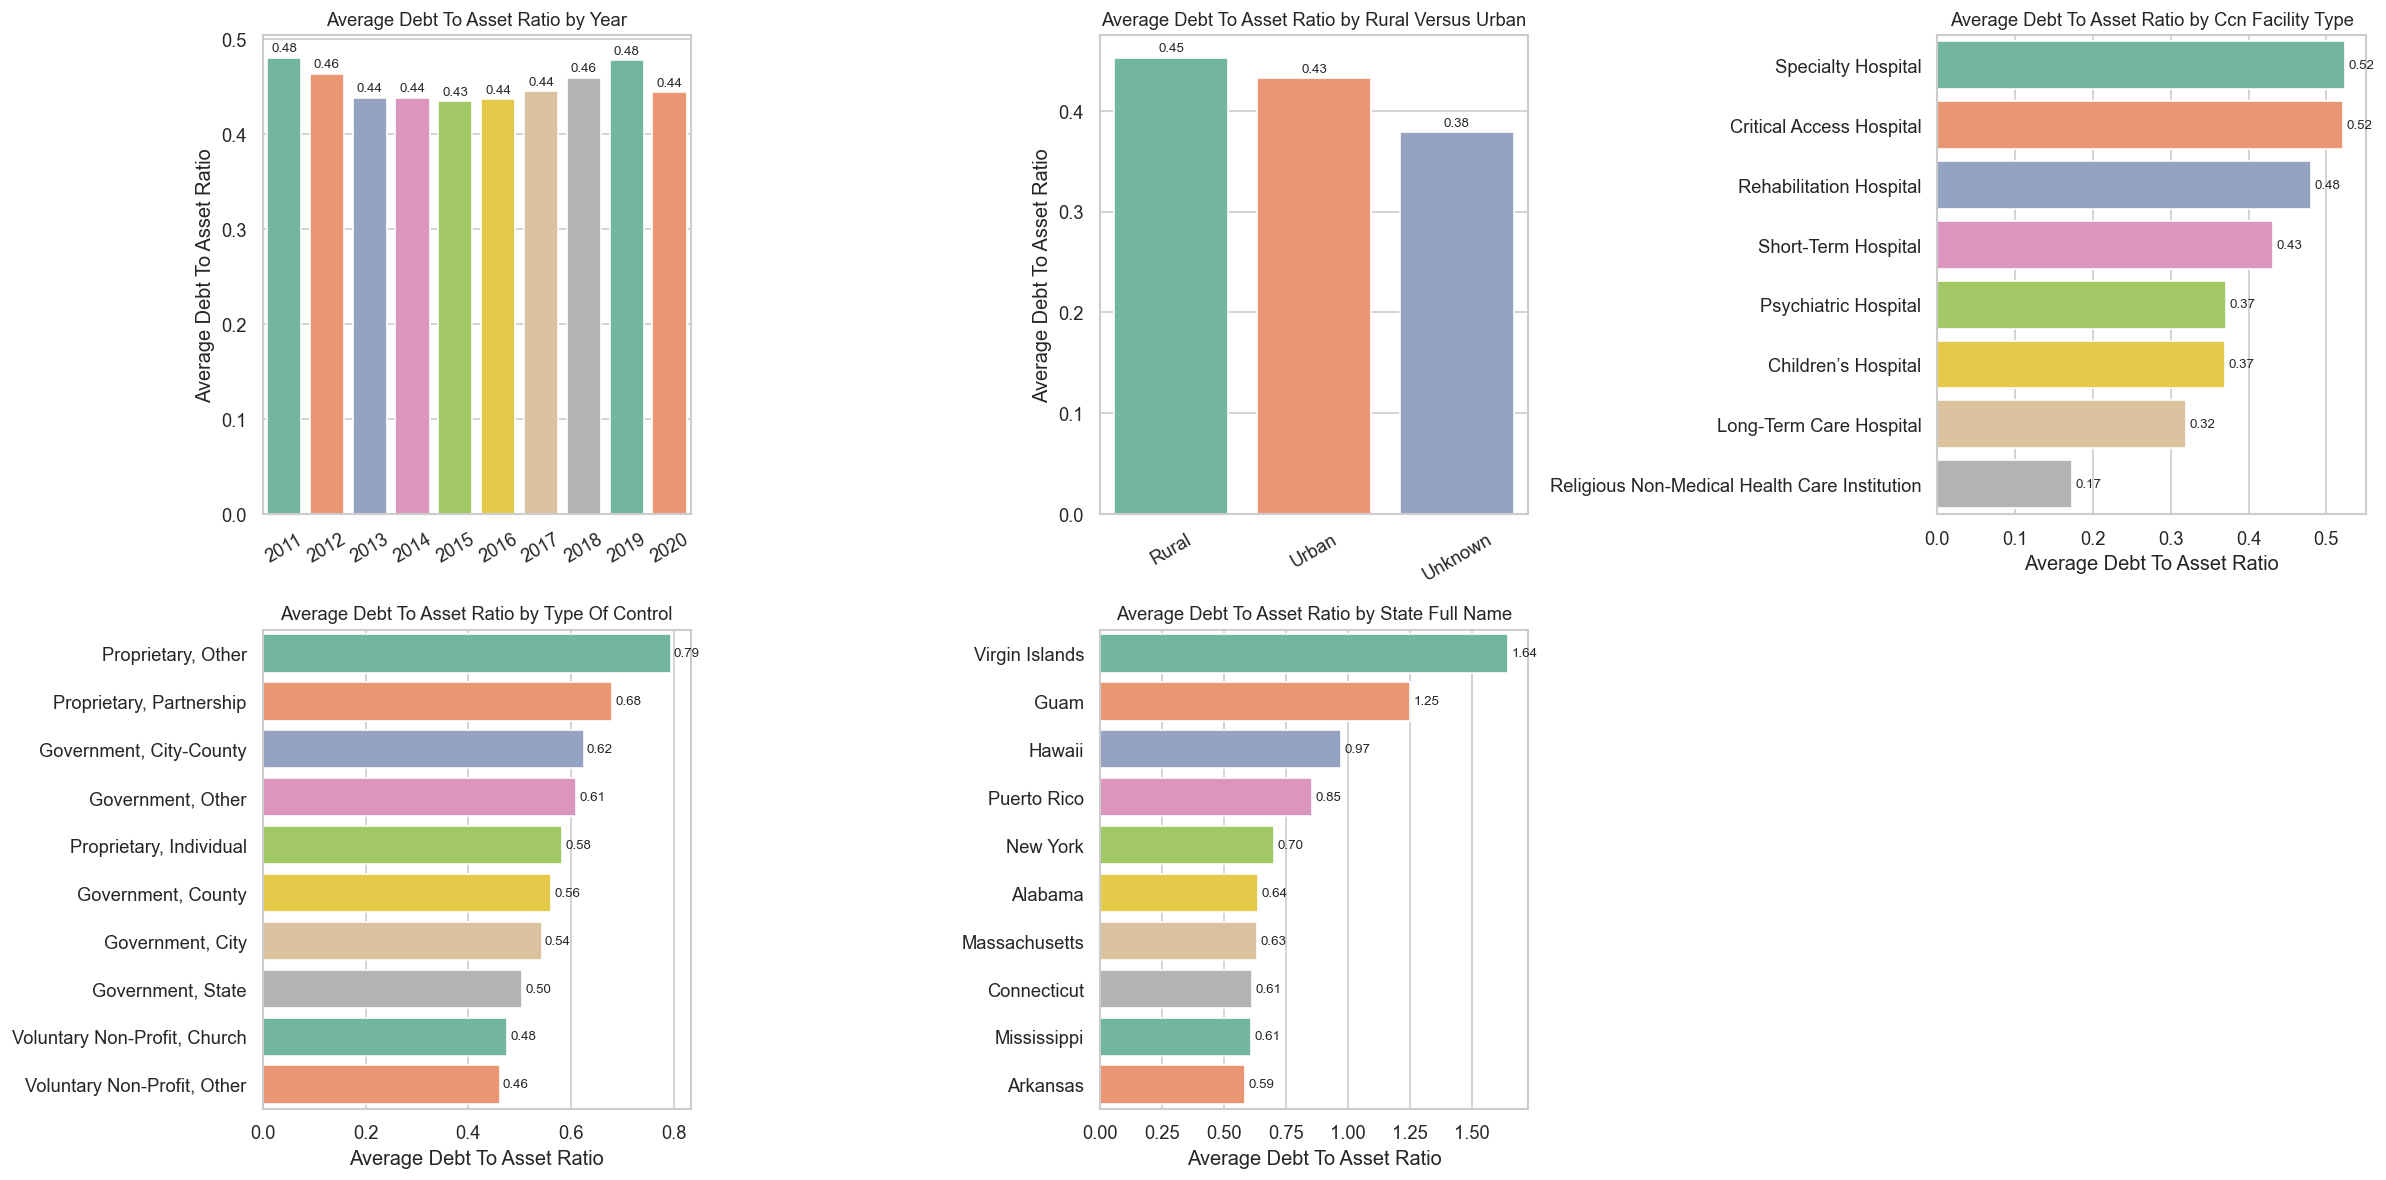

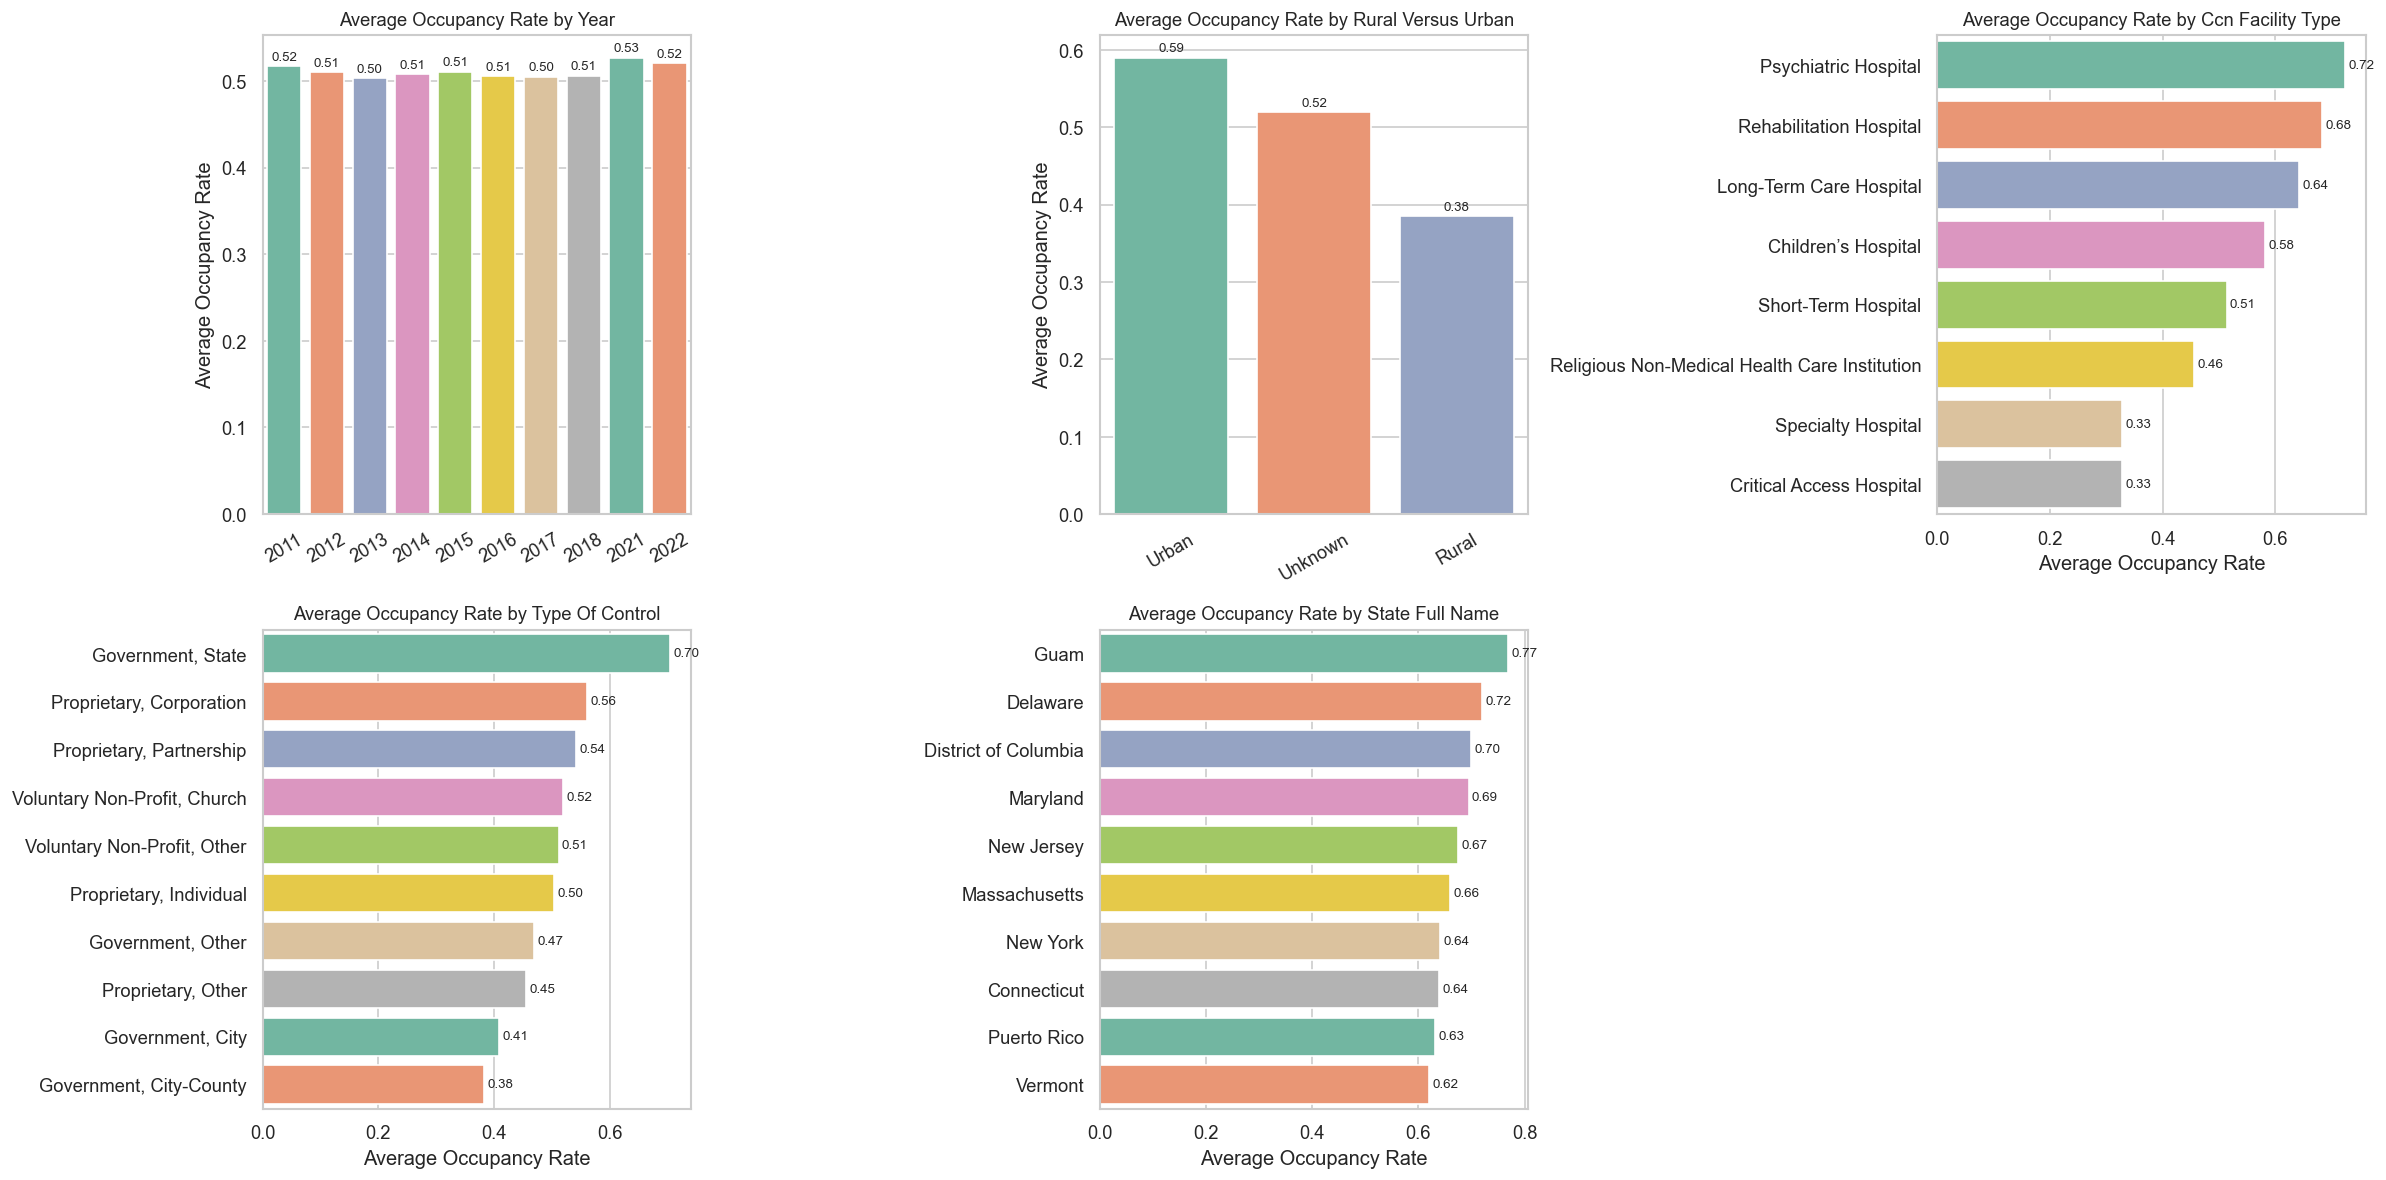

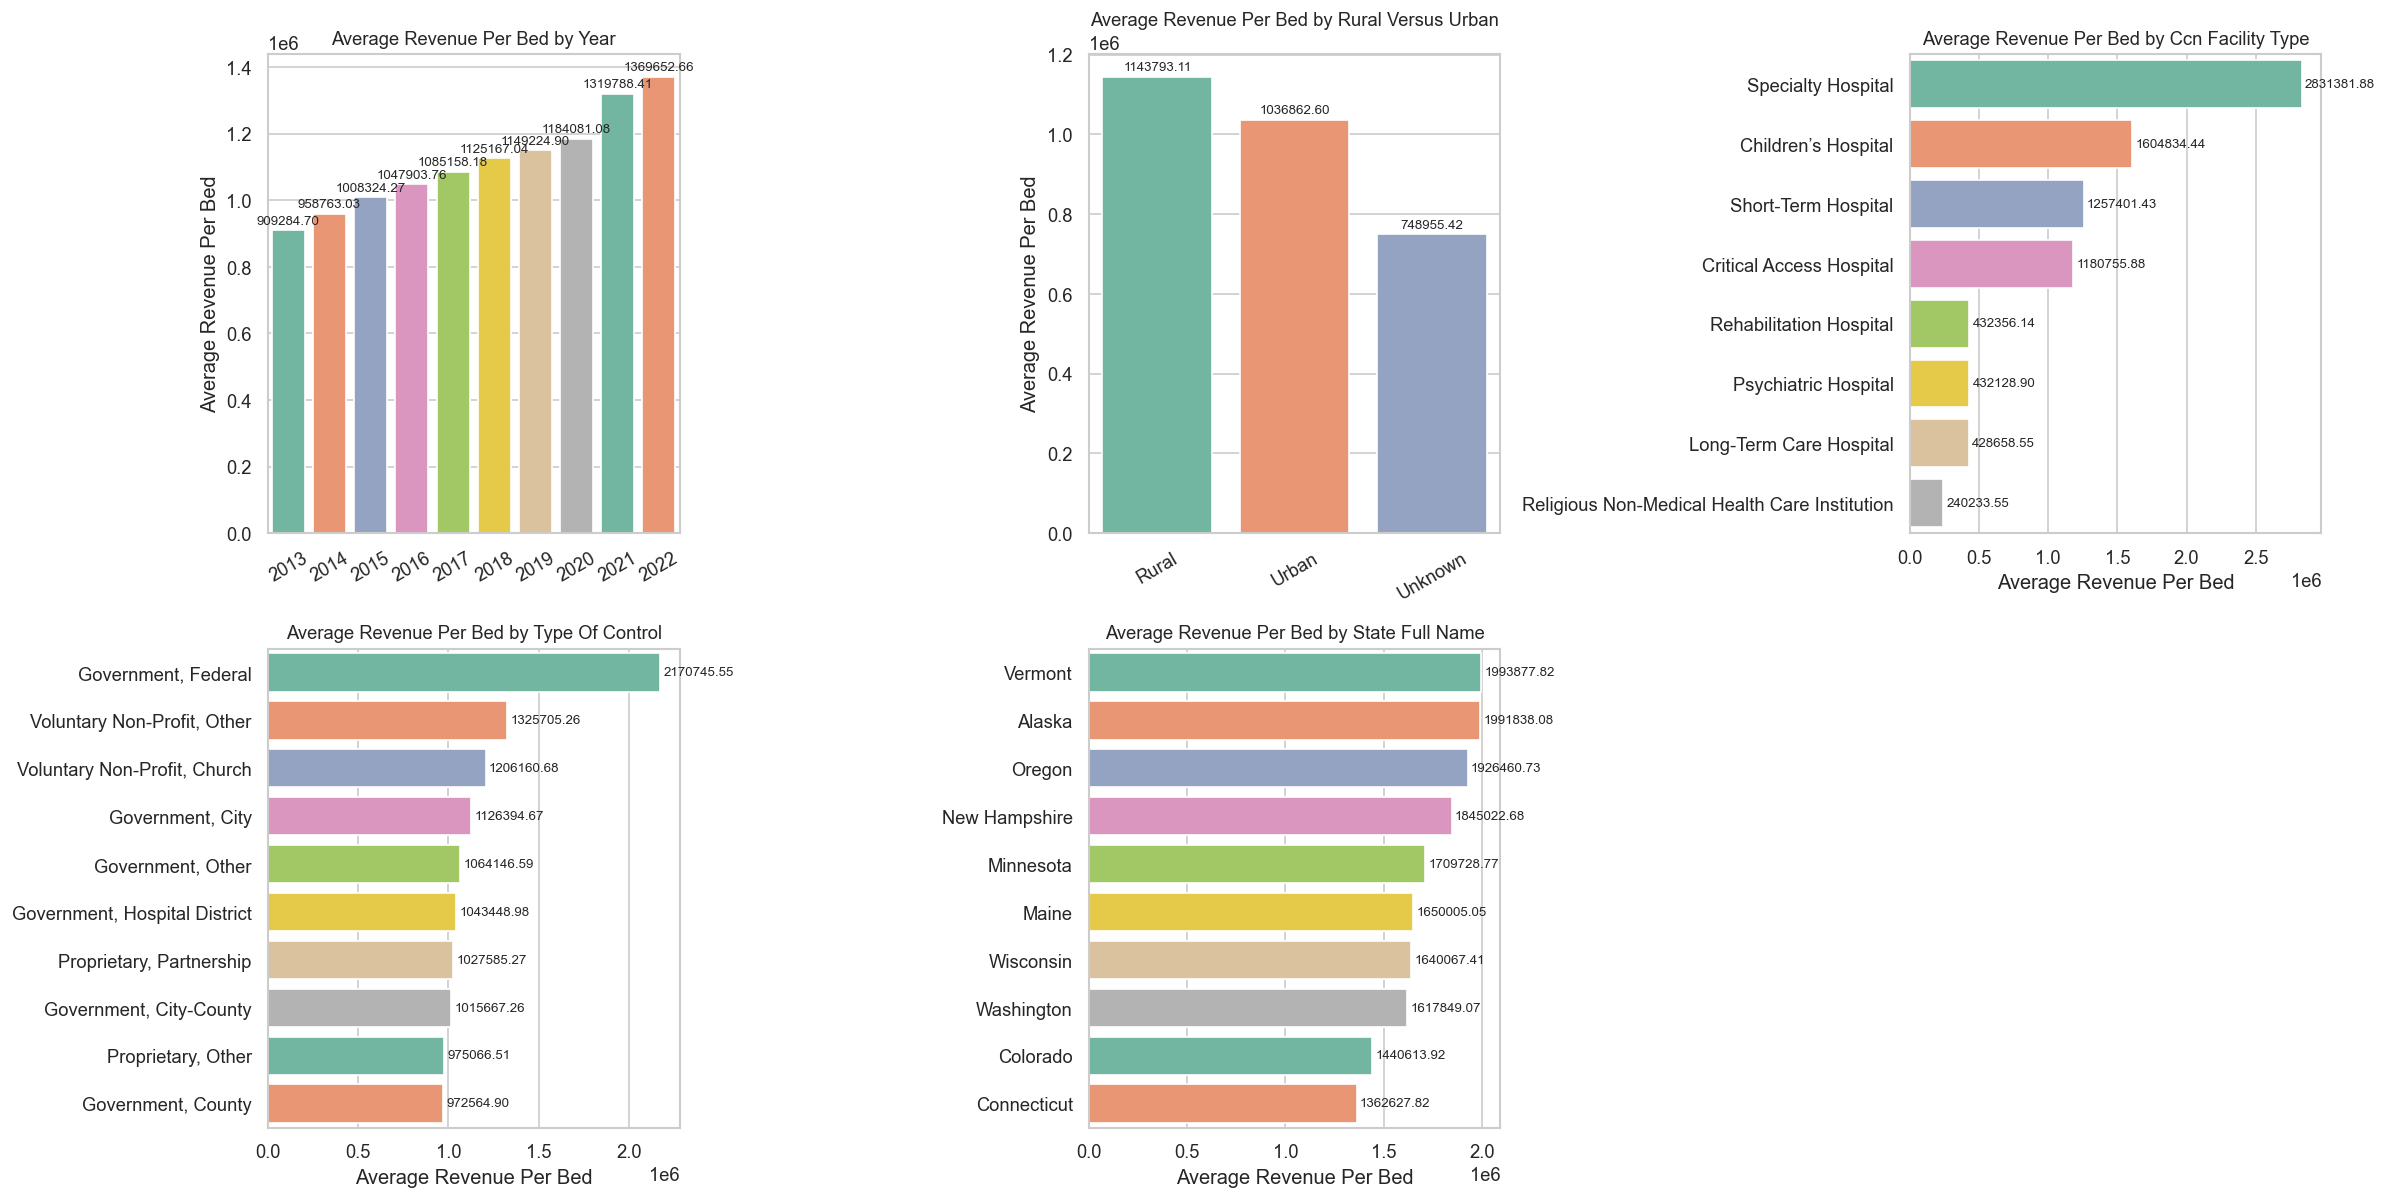

In [45]:
import os

if 'year' in df.columns:
    df['year'] = df['year'].astype(str)

key_num_cols = [
    'profit_margin_calc',
    'expense_ratio',
    'current_ratio',
    'debt_to_asset_ratio',
    'occupancy_rate',
    'revenue_per_bed'
]

key_cat_cols = [
    'year',
    'rural_versus_urban',
    'ccn_facility_type',
    'type_of_control',
    'state_full_name'
]
sns.set(style="whitegrid")

for num in key_num_cols:
    rows = math.ceil(len(key_cat_cols) / 3)
    fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))
    axes = axes.flatten()

    for i, cat in enumerate(key_cat_cols):
        mean_df = (
            df.groupby(cat, observed=True)[num]
              .mean()
              .sort_values(ascending=False)
              .head(10)
              .reset_index()
        )

        if cat == 'year':
            mean_df[cat] = pd.Categorical(mean_df[cat],
                                          categories=sorted(mean_df[cat].unique(), key=lambda x: int(x)),
                                          ordered=True)

        # --- Use horizontal bar chart for long labels ---
        if mean_df[cat].astype(str).str.len().max() > 12:
            sns.barplot(
                data=mean_df, y=cat, x=num, hue=cat, palette="Set2",
                legend=False, ax=axes[i]
            )
            axes[i].set_xlabel(f"Average {num.replace('_', ' ').title()}")
            axes[i].set_ylabel("")
        else:
            sns.barplot(
                data=mean_df, x=cat, y=num, hue=cat, palette="Set2",
                legend=False, ax=axes[i]
            )
            axes[i].set_xlabel("")
            axes[i].set_ylabel(f"Average {num.replace('_', ' ').title()}")
            axes[i].tick_params(axis='x', rotation=30)

        axes[i].set_title(f"Average {num.replace('_', ' ').title()} by {cat.replace('_', ' ').title()}",
                          fontsize=11)

        for container in axes[i].containers:
            axes[i].bar_label(container, fmt="%.2f", fontsize=8, padding=2)

    for j in range(len(key_cat_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

Found 6 significant categorical relationships (Cramer's V ≥ 0.2)


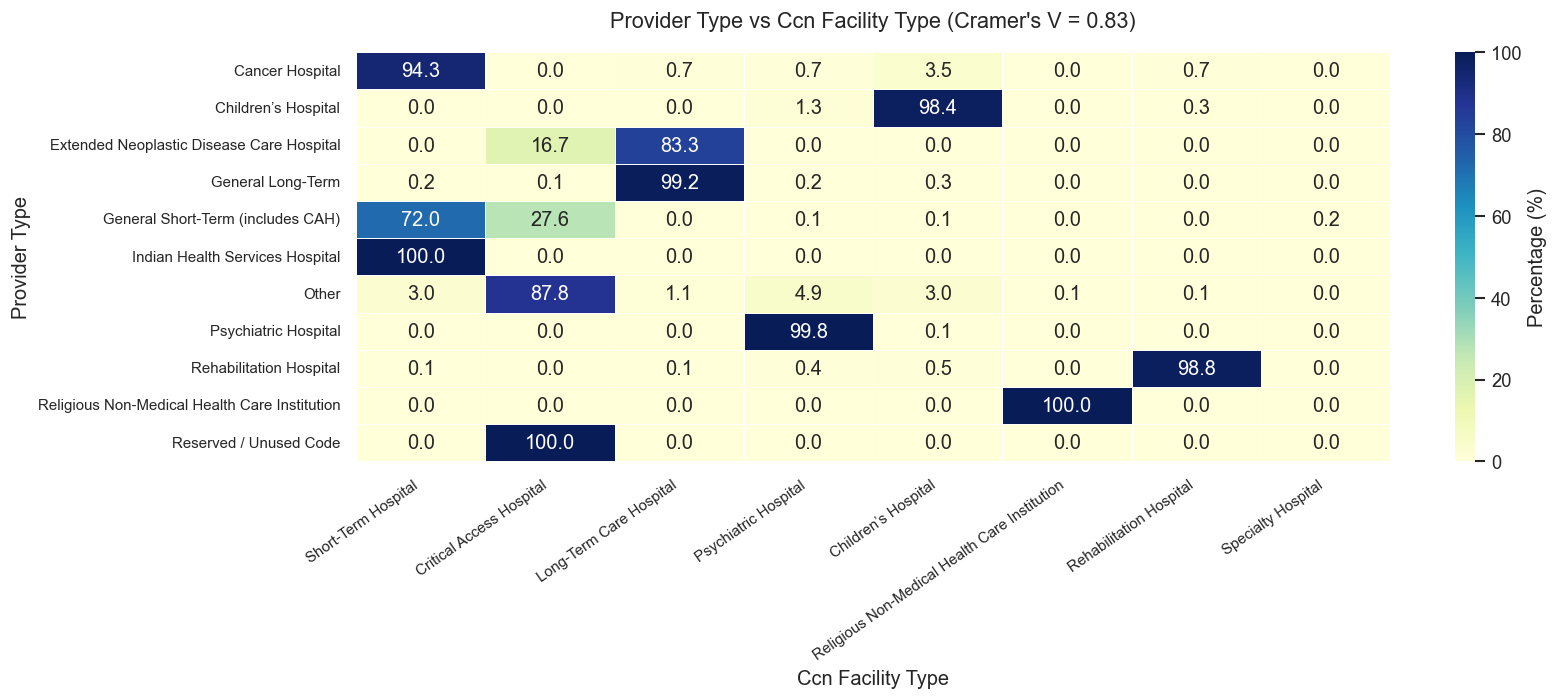

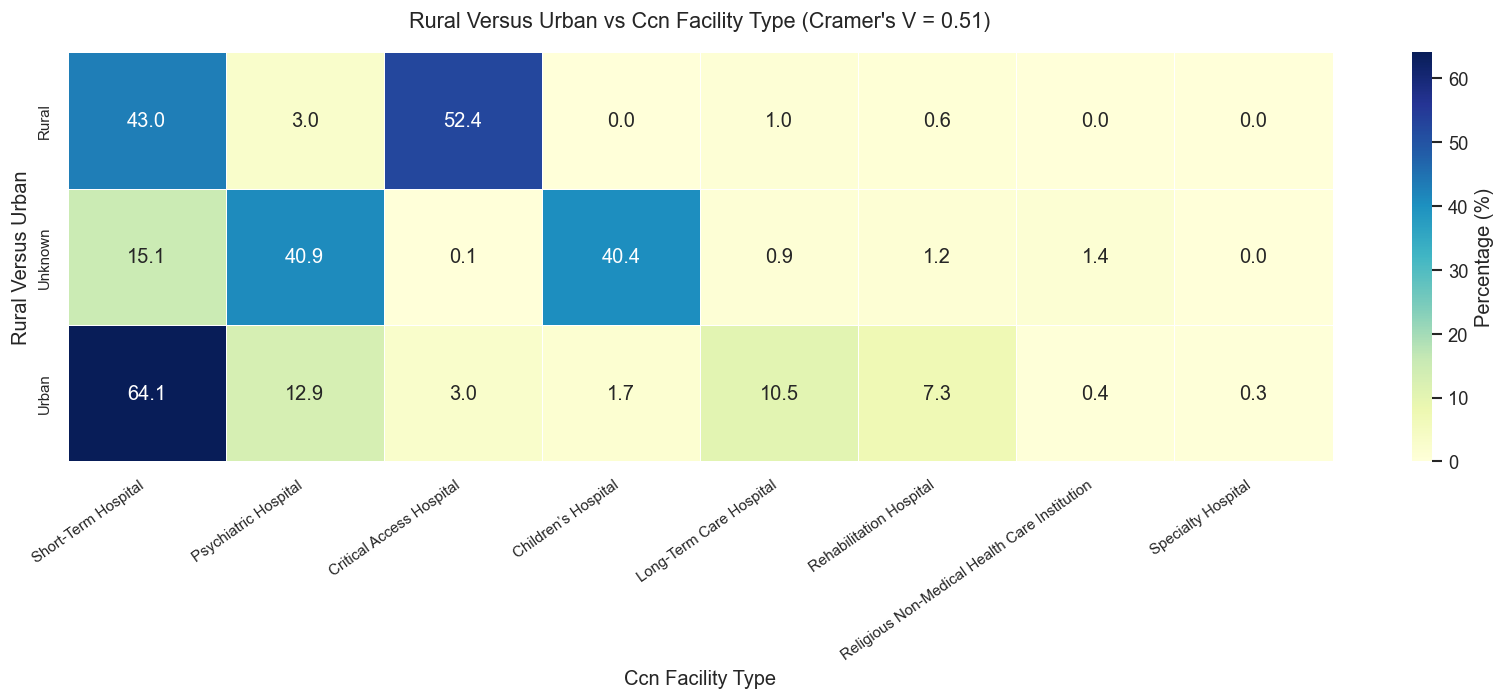

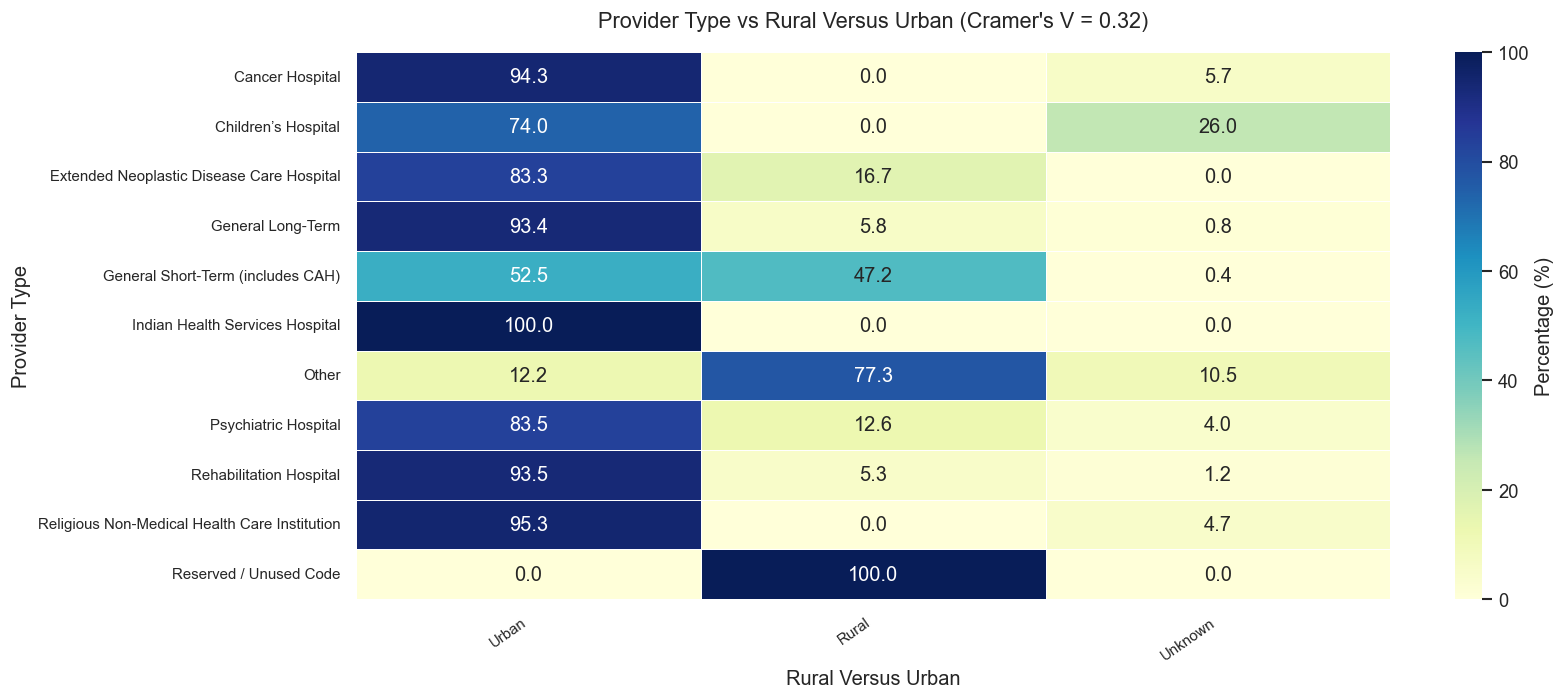

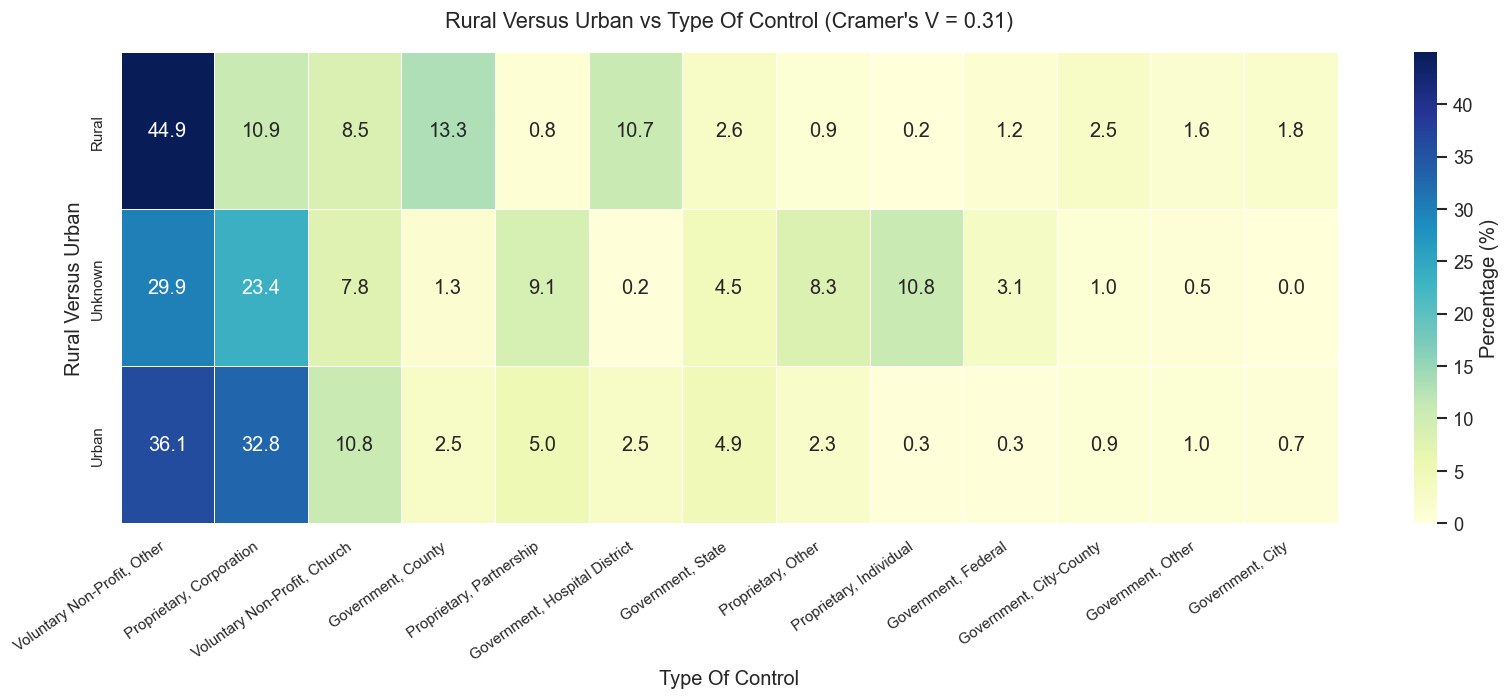

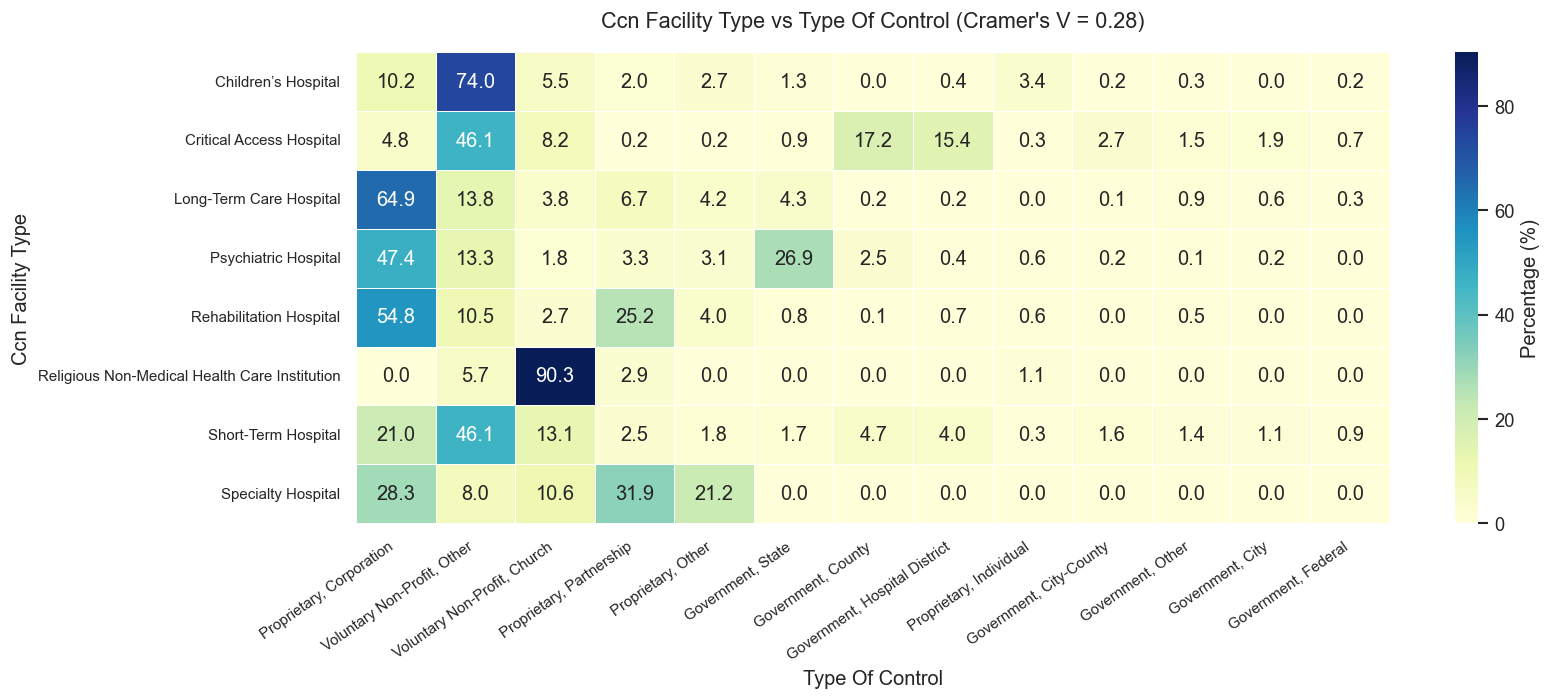

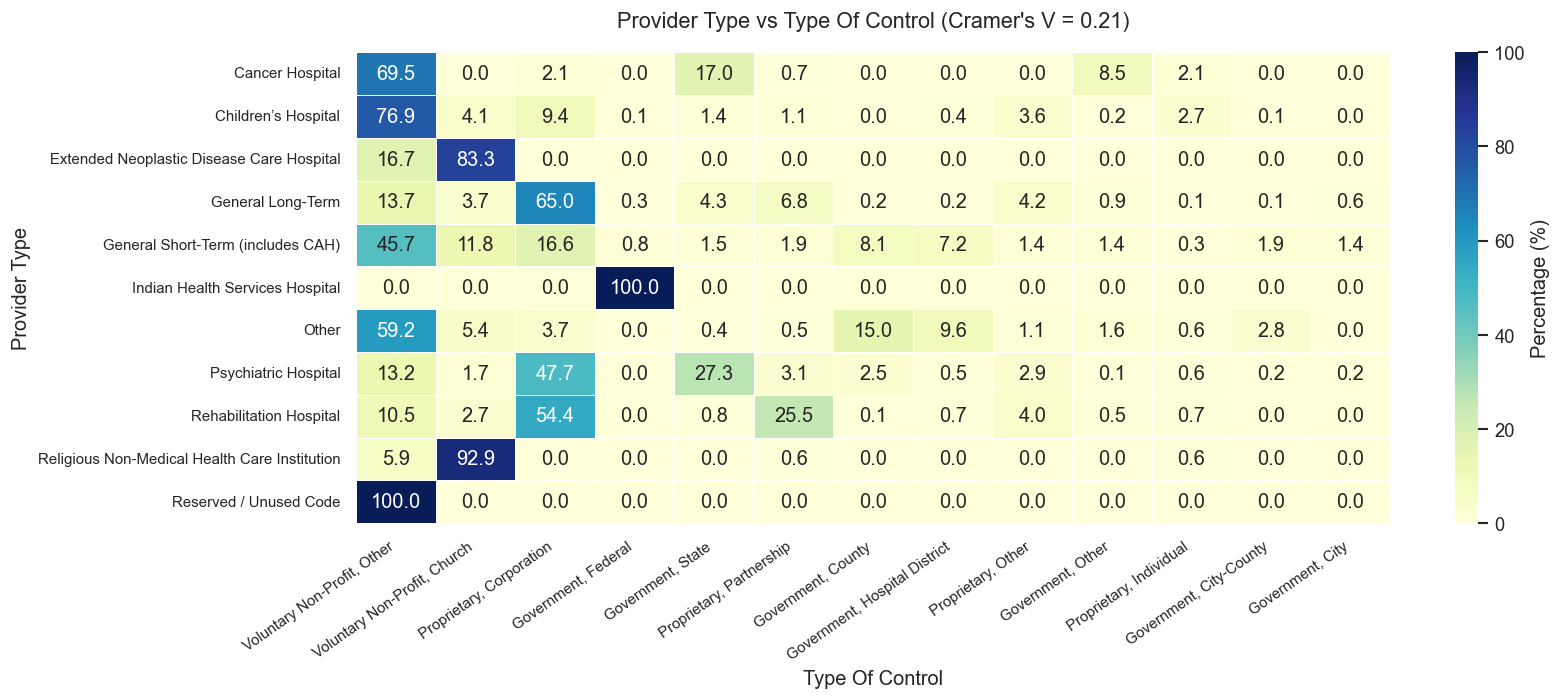

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import os

sns.set(style="whitegrid")

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cat_cols = [c for c in df.select_dtypes(include=['object', 'category']).columns
            if 3 <= df[c].nunique() <= 25]

pairs = [(cat_cols[i], cat_cols[j]) for i in range(len(cat_cols))
         for j in range(i + 1, len(cat_cols))]

significant_pairs = []
for x, y in pairs:
    v = cramers_v(df[x], df[y])
    if v >= 0.2:
        significant_pairs.append((x, y, v))

significant_pairs = sorted(significant_pairs, key=lambda x: x[2], reverse=True)

print(f"Found {len(significant_pairs)} significant categorical relationships (Cramer's V ≥ 0.2)")

for x, y, v in significant_pairs:
    ctab = pd.crosstab(df[x], df[y], normalize='index') * 100
    ctab = ctab[ctab.mean().sort_values(ascending=False).index]

    plt.figure(figsize=(14, 6))
    sns.heatmap(ctab, cmap="YlGnBu", annot=True, fmt=".1f",
                linewidths=0.3, cbar_kws={'label': 'Percentage (%)'})

    plt.title(f"{x.replace('_',' ').title()} vs {y.replace('_',' ').title()} (Cramer's V = {v:.2f})",
              fontsize=13, pad=15)
    plt.xlabel(y.replace('_',' ').title())
    plt.ylabel(x.replace('_',' ').title())
    plt.xticks(rotation=35, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()

#### Bivariate Analysis Summary

**1. Numeric vs Numeric Relationships**

**Key Observations**

* Strong positive correlations exist between `number_of_beds`, `total_bed_days_available`, `total_discharges`, and `fte_employees_on_payroll`, indicating that larger hospitals handle more patients and employ more staff.
* `net_income` and `total_income` show a near-perfect correlation (r ≈ 0.96), confirming that higher revenue strongly drives profitability.
* `net_patient_revenue` and `total_costs` are highly correlated (r ≈ 0.97), suggesting that operating costs scale proportionally with income.
* High correlations across financial and operational indicators reflect consistent hospital size effects across the dataset.
* No strong negative correlations were observed, implying limited inverse relationships between numeric metrics.

**Insight**
Financial and operational variables in hospitals tend to increase together. Larger institutions are costlier to operate but also more profitable, demonstrating clear economies of scale.

**2. Numeric vs Categorical Relationships**

**Profit Margin Analysis**

* Facility Type: Specialty and Rehabilitation Hospitals show the highest average profit margins, reflecting stronger financial efficiency in specialized care.
* Type of Control: Proprietary (Partnership) facilities outperform non-profit and government hospitals in profitability.
* State: Utah and Delaware report the highest average margins, indicating regional efficiency advantages.
* Yearly Trend: Profit margins improved after 2020, likely due to post-pandemic recovery and financial adjustments.

**Expense Ratio Analysis**

* Expense ratios remain largely stable around 0.95, indicating consistent cost behavior.
* Government (State) and Religious Non-Medical institutions show higher expense ratios, reflecting lower cost efficiency.
* Urban facilities show slightly higher expense levels than rural ones.

**Current Ratio Analysis**

* Liquidity is highest in Religious Non-Medical and Rehabilitation Hospitals, showing strong short-term solvency.
* Government (Hospital District) and Rural hospitals maintain better liquidity compared to urban ones.

**Debt-to-Asset Ratio Analysis**

* Non-Profit hospitals maintain lower leverage compared to Proprietary or Government hospitals.
* Specialty and Critical Access Hospitals show moderate debt utilization, suggesting controlled borrowing.
* Religious Non-Medical institutions carry the least debt, reflecting conservative financial management.

**Occupancy Rate Analysis**

* Average occupancy remains near 50% across most hospital types.
* Psychiatric and Rehabilitation Hospitals show higher occupancy (~70%), while Critical Access and Specialty Hospitals operate at lower utilization levels.
* State-run hospitals maintain the highest occupancy rates overall.

**Revenue per Bed Analysis**

* Revenue per bed has steadily increased between 2013 and 2022.
* Specialty Hospitals and Federal Government facilities generate the highest revenue per bed, indicating greater service value.
* Rural hospitals report higher revenue per bed than urban ones, suggesting efficient utilization despite smaller scale.

**3. Categorical vs Categorical Relationships**

**Provider Type vs Facility Type (Cramer’s V = 0.83)**

* Very strong association between provider and facility type.
* Specific provider types correspond closely to certain facilities (e.g., Cancer Hospitals → Specialty Hospitals, Psychiatric Providers → Psychiatric Hospitals).
* Indicates consistent classification within hospital reporting systems.

**Rural Versus Urban vs Facility Type (Cramer’s V = 0.51)**

* Moderate association between location and facility type.
* Short-Term and Psychiatric Hospitals are primarily urban, while Critical Access Hospitals dominate rural areas.
* Reflects structural and geographic specialization in hospital distribution.

**Provider Type vs Rural Versus Urban (Cramer’s V = 0.32)**

* Moderate relationship between provider specialization and location.
* Cancer and Long-Term Care Hospitals are mainly urban; General Short-Term Hospitals are more evenly distributed.
* Highlights regional accessibility differences in healthcare services.

**Facility Type vs Type of Control (Cramer’s V = 0.28)**

* Weak-to-moderate relationship between facility type and ownership.
* Children’s and Short-Term Hospitals are typically proprietary or non-profit.
* Rehabilitation and Long-Term Care Hospitals show mixed ownership structures, reflecting diverse management models.

**Provider Type vs Type of Control (Cramer’s V = 0.21)**

* Weak relationship between provider specialization and ownership type.
* Most provider types appear across multiple ownership structures.
* Religious Non-Medical providers are primarily non-profit, while Psychiatric and Rehabilitation hospitals vary by control type.

**4. Overall Observations**

* Hospital characteristics are highly interdependent, with financial and operational variables strongly correlated.
* Scale indicators such as beds, discharges, and staff directly influence income, costs, and overall profitability.
* Profitability and liquidity vary across facility types and ownership structures.
* Specialized and proprietary hospitals show stronger financial performance, while rural and government-run hospitals maintain higher liquidity but lower margins.
* Categorical associations confirm consistency in classification systems and reveal moderate geographic variation among U.S. hospital types.


**3. Multivariate Analysis**

##### K-Means and PCA Analysis Overview

To uncover hidden performance patterns among hospitals, a **multivariate clustering approach** was applied using **K-Means clustering** combined with **Principal Component Analysis (PCA)**.

The dataset contained multiple correlated financial and operational indicators such as `profit_margin_calc`, `expense_ratio`, `current_ratio`, `debt_to_asset_ratio`, `revenue_per_bed`, and `occupancy_rate`. Since these variables often move together, PCA was first used to **reduce dimensionality** and extract the most informative features.

PCA transformed these correlated metrics into two **principal components (PC1 and PC2)** that summarize the dataset’s key variation:

* **PC1 (Financial Efficiency):** Captures profitability and cost-effectiveness across hospitals.
* **PC2 (Operational Scale and Liquidity):** Represents hospital capacity, utilization, and short-term financial stability.

After dimensionality reduction, **K-Means clustering** grouped hospitals into **three distinct performance clusters** based on their combined financial and operational characteristics.
This method allows us to visually and analytically identify **high-performing**, **moderate**, and **low-performing** hospital groups within the PCA space — providing insights into how efficiency, cost control, and resource utilization jointly define organizational performance.

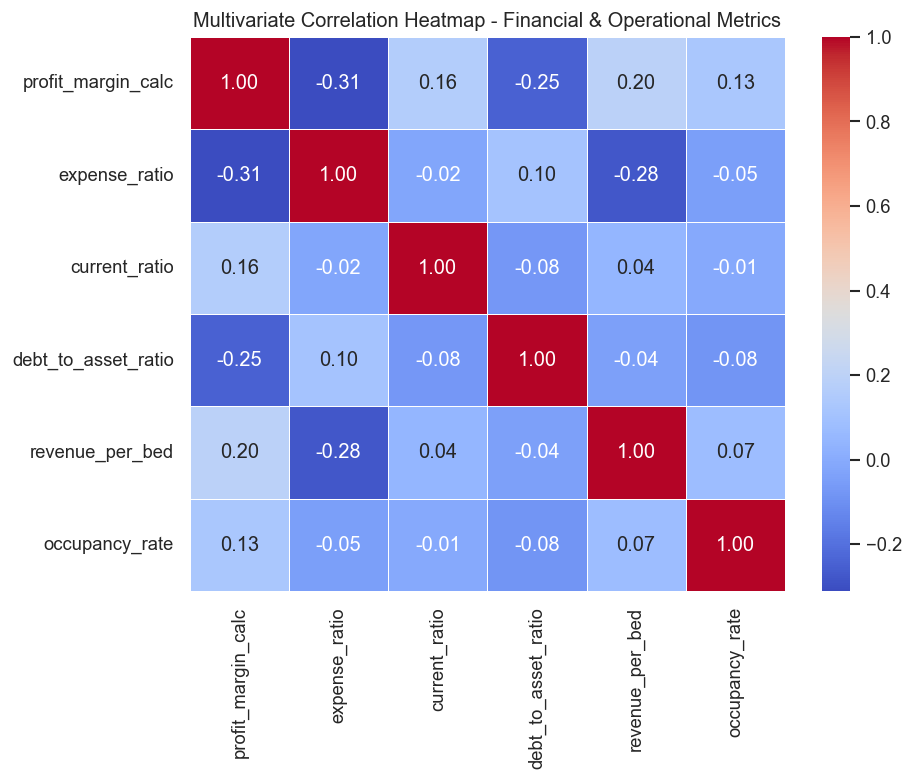

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = [
    'profit_margin_calc', 'expense_ratio', 'current_ratio', 
    'debt_to_asset_ratio', 'revenue_per_bed', 'occupancy_rate'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Multivariate Correlation Heatmap - Financial & Operational Metrics")
plt.show()

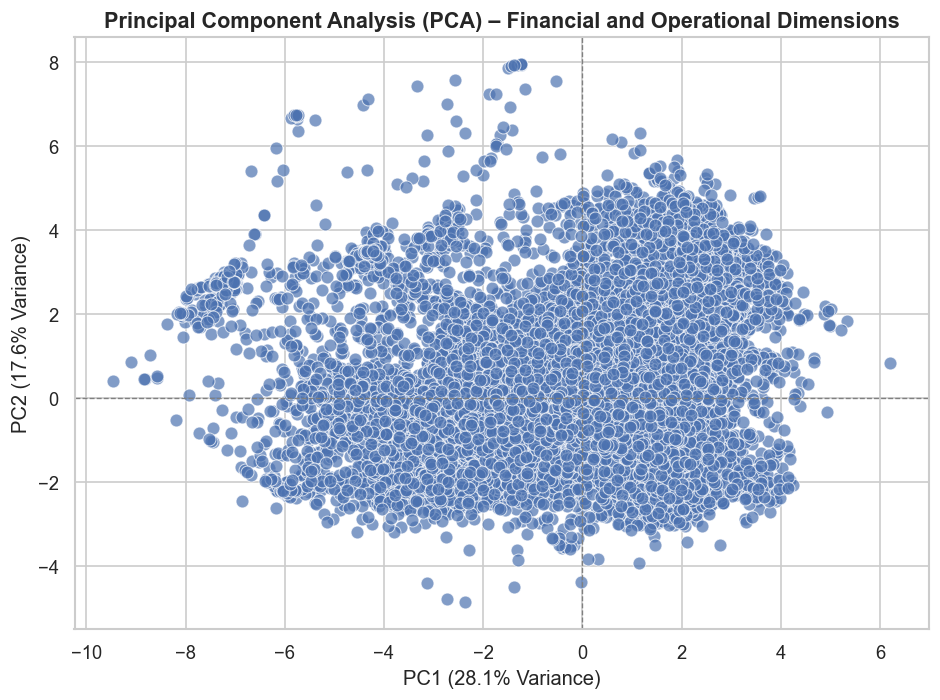

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

num_cols = [
    'profit_margin_calc', 'expense_ratio', 'current_ratio', 
    'debt_to_asset_ratio', 'revenue_per_bed', 'occupancy_rate'
]

X = df[num_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.7, s=60)
plt.title("Principal Component Analysis (PCA) – Financial and Operational Dimensions", fontsize=13, fontweight='bold')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric KPI variables
num_cols = [
    'profit_margin_calc', 'expense_ratio', 'current_ratio',
    'debt_to_asset_ratio', 'revenue_per_bed', 'occupancy_rate'
]

# Scale and fit PCA
X = df[num_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)

# Create loadings dataframe
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=num_cols
)

# Sort by importance (absolute value)
loadings['abs_PC1'] = loadings['PC1'].abs()
loadings['abs_PC2'] = loadings['PC2'].abs()
loadings = loadings.sort_values(by='abs_PC1', ascending=False)

# Display table neatly
print("\nPCA Component Loadings:")
display(loadings[['PC1', 'PC2']].round(3))

# Explain variance ratio
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio*100:.2f}%")



PCA Component Loadings:


PC1    PC2
profit_margin_calc   0.575  0.153
expense_ratio       -0.509  0.382
revenue_per_bed      0.427 -0.487
debt_to_asset_ratio -0.362 -0.491
occupancy_rate       0.227  0.046
current_ratio        0.214  0.591


Explained Variance Ratio:
PC1: 28.13%
PC2: 17.57%


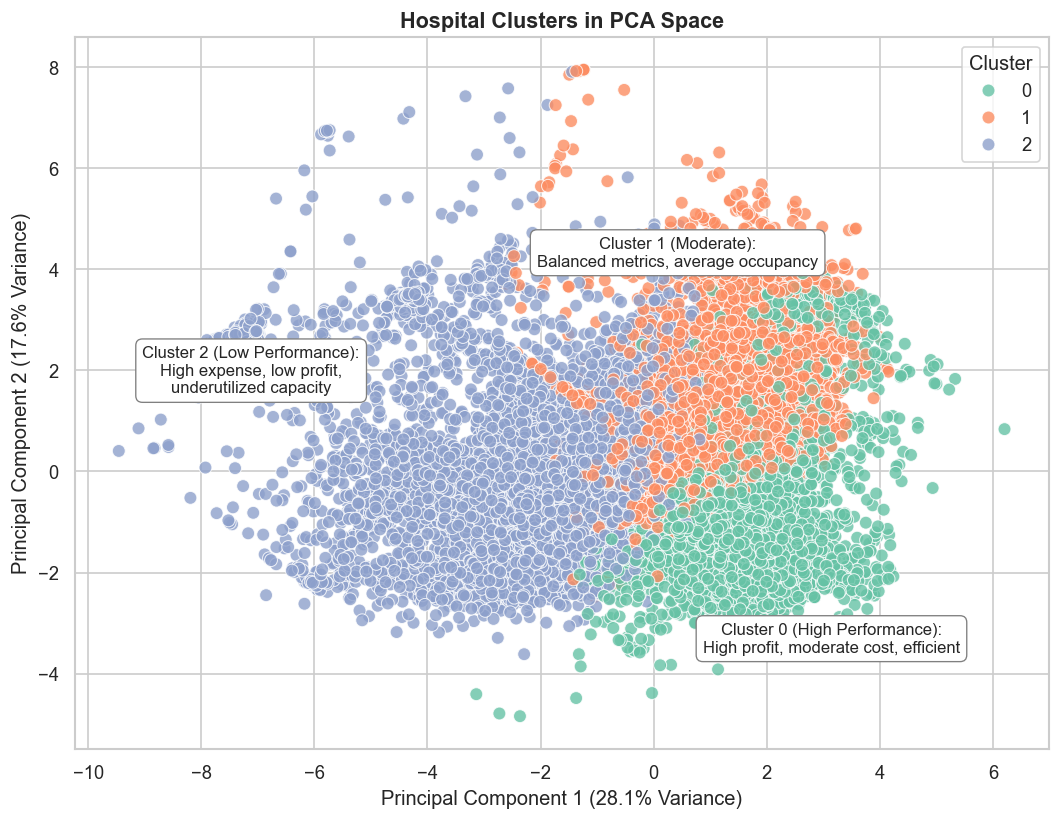

In [50]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

num_cols = [
    'profit_margin_calc', 'expense_ratio', 'current_ratio',
    'debt_to_asset_ratio', 'revenue_per_bed', 'occupancy_rate'
]

X = df[num_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X['cluster'] = clusters

# PCA reduction for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
X['PC1'] = pca_result[:, 0]
X['PC2'] = pca_result[:, 1]

# Centroids
centroids = pd.DataFrame(pca.transform(kmeans.cluster_centers_), columns=['PC1', 'PC2'])
palette = sns.color_palette('Set2', 3)

plt.figure(figsize=(9,7))
sns.scatterplot(data=X, x='PC1', y='PC2', hue='cluster', palette=palette, alpha=0.8, s=60)

plt.title("Hospital Clusters in PCA Space", fontsize=13, fontweight='bold')
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)")

# Cluster interpretations
annotations = {
    0: ("Cluster 0 (High Performance):\nHigh profit, moderate cost, efficient", (2, -2.5)),
    1: ("Cluster 1 (Moderate):\nBalanced metrics, average occupancy", (0, 4)),
    2: ("Cluster 2 (Low Performance):\nHigh expense, low profit,\nunderutilized capacity", (-6, 2))
}

for i, (text, offset) in annotations.items():
    plt.text(
        centroids.loc[i, 'PC1'] + offset[0],
        centroids.loc[i, 'PC2'] + offset[1],
        text,
        fontsize=10,
        fontweight='medium',
        bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", lw=0.8),
        ha='center', va='center'
    )

plt.legend(title="Cluster", loc='upper right')
plt.tight_layout()
plt.show()

##### Multivariate Analysis Summary  

To evaluate complex relationships among hospital performance metrics, a **multivariate approach** combining **correlation analysis**, **Principal Component Analysis (PCA)**, and **K-Means clustering** was applied.  

The analysis focused on six interrelated indicators — `profit_margin_calc`, `expense_ratio`, `current_ratio`, `debt_to_asset_ratio`, `revenue_per_bed`, and `occupancy_rate` — representing profitability, cost, liquidity, leverage, and efficiency.  

**1. Correlation Insights:**  
Moderate relationships exist between financial metrics. Profit margin decreases as expenses and debt increase, while revenue per bed shows a slight positive link to profitability. Liquidity and occupancy rate remain largely independent of cost and income.  

**2. PCA Analysis:**  
PCA reduced the dataset into two key components explaining **45.7%** of total variance:  
* **PC1 (Financial Efficiency):** Highlights profit, cost, and debt balance — separating efficient from high-cost hospitals.  
* **PC2 (Liquidity and Utilization):** Reflects solvency and operational scale differences.  

**3. K-Means Clustering:**  
Using PCA components, hospitals were grouped into three performance clusters:  
* **Cluster 0 (High Performance):** High profit, moderate cost, efficient operations.  
* **Cluster 1 (Moderate):** Balanced metrics and average occupancy.  
* **Cluster 2 (Low Performance):** High expenses, low profit, underutilized capacity.  

**4. Key Insight:**  
Hospitals naturally form distinct financial profiles. Cost efficiency and debt control drive profitability more than occupancy or liquidity, illustrating structural and operational diversity across the U.S. hospital system.